In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from tqdm import tqdm
import pickle
import os
import socket
from Bio import Seq, SeqIO


if 'biochem1' in socket.gethostname():
    dataPBase = '/avicenna/vramani/analyses/pacbio/'
    figPBase = '/avicenna/cmcnally/pbanalysis/'
if 'titan' in socket.gethostname():
    dataPBase = '/data/users/goodarzilab/colin/results/pacbio/'
if 'wynton' in socket.gethostname():
    dataPBase = '/wynton/group/goodarzilab/ramanilab/results/pacbio/'
if 'rumi' in socket.gethostname():
    raise Exception('no pacbio results folder on rumi')
    
    
sampleRef = pd.read_csv(dataPBase + 'sampleRef_K562_mESC.csv', sep=',', index_col=0)

#sampleRef = pd.concat([pd.read_csv(dataPBase + '210520_NA_K562Brdu_repeat/210520_NA_K562Brdu_repeat.sampleReference.wynton.csv',index_col=0),
#                       pd.read_csv(dataPBase + '210930_MO_E14_K562_BrdU/210930_MO_E14_K562_BrdU.sampleReference.wynton.csv',index_col=0),
#                       pd.read_csv(dataPBase + '211014_MO_BrdU_invivo/211014_MO_BrdU_invivo.sampleReference.wynton.csv',index_col=0)],
#                     ignore_index=True)
sampleRef

,cell,sampleName,unalignedSubreadsFile,ccsFile,alignedSubreadsFile,alignedCcsFile,reference,processed,index
0,pbrun9_SAMv2,k562_SAMv2_minusM_rep1,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/genomes/hg38/hg38.mmi,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN
1,pbrun9_SAMv2,k562_SAMv2_minusM_rep2,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/genomes/hg38/hg38.mmi,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN
2,pbrun9_SAMv2,k562_SAMv2_plusM_rep1,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/genomes/hg38/hg38.mmi,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN
3,pbrun9_SAMv2,k562_SAMv2_plusM_rep2,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/genomes/hg38/hg38.mmi,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN
4,pbrun11_mESCs_SNF2h,SNF2hKO_mESCs_plusM_rep1,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
5,pbrun11_mESCs_SNF2h,SNF2hKO_mESCs_plusM_rep2,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
6,pbrun11_mESCs_SNF2h,SNF2hKO_mESCs_minusM_rep1,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
7,pbrun11_mESCs_SNF2h,SNF2hKO_mESCs_minusM_rep2,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
8,pbrun11_mESCs_SNF2h,SNF2hWTAB_mESCs_plusM_rep1,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
9,pbrun11_mESCs_SNF2h,SNF2hWTAB_mESCs_plusM_rep2,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN


In [13]:
import glob
# merge a zmwinfo file
samp = 27
sampCN = sampleRef['cell'][samp] + '_' + sampleRef['sampleName'][samp]
inffiles = [os.path.basename(x) for x in glob.glob(os.path.join(dataPBase, sampleRef['cell'][samp], 'processed', 'full', 'tmp.' +  sampCN +
                                                                '_part*_full_zmwinfo.pickle'))]
zminfoC = pd.DataFrame()
# combine zmw information files
for inff in inffiles:
    zminfoC = pd.concat([zminfoC, pd.read_pickle(os.path.join(dataPBase, sampleRef['cell'][samp],'processed','full',inff))], sort=False)
# reset indices for combined zmwinfo dataframe
zminfoC = zminfoC.sort_values('zmw')
zminfoC.reset_index(drop=True, inplace=True)
# write combined files to pickle
zminfoC.to_pickle(os.path.join(dataPBase, sampleRef['cell'][samp], 'processed', 'full', sampCN + '_full_zmwinfo.pickle'))

In [3]:
# Merge HMM out files

usesamples = [2,3,6,7,10,11,19,21,23,25,27,0,8,20,28]

for samp in usesamples:
    import glob

    hmmPieces = glob.glob('{0}{1}/processed/binarized/HMMout/{1}_{2}_HMMres_piece*.pickle'.format(dataPBase,
                                                                                                  sampleRef['cell'][samp],
                                                                                                  sampleRef['sampleName'][samp]))
    hmmPieces = sorted(hmmPieces)

    hmmAll = {}

    for piece in tqdm(hmmPieces, position=0):
        with open(piece,'rb') as fopen:
            hmmPart = pickle.load(fopen)
        hmmAll.update(hmmPart)

    with open('{0}{1}/processed/binarized/{1}_{2}_NNsingle_HMM.pickle'.format(dataPBase,
                                                                              sampleRef['cell'][samp],
                                                                              sampleRef['sampleName'][samp]), 'wb') as fout:
        pickle.dump(hmmAll, fout)

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 57.69it/s]


In [7]:
'{0}{1}/processed/binarized/HMMout/{1}_{2}_HMMres_piece*.pickle'.format(dataPBase,
                                                                                                  sampleRef['cell'][samp],
                                                                                                  sampleRef['sampleName'][samp])

'/avicenna/vramani/analyses/pacbio/210427_NA_SAMv2mESCs_2.0prep/processed/binarized/HMMout/210427_NA_SAMv2mESCs_2.0prep_E14mESC_gDNAplusM_HMMres_piece*.pickle'

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from tqdm import tqdm
import pickle
import os
import socket


if 'biochem1' in socket.gethostname():
    dataPBase = '/avicenna/vramani/analyses/pacbio/'
    figPBase = '/avicenna/cmcnally/pbanalysis/'
if 'titan' in socket.gethostname():
    dataPBase = '/data/users/goodarzilab/colin/results/pacbio/'
if 'wynton' in socket.gethostname():
    dataPBase = '/wynton/group/goodarzilab/ramanilab/results/pacbio/'
if 'rumi' in socket.gethostname():
    raise Exception('no pacbio results folder on rumi')
    
    
#sampleRef = pd.read_csv(dataPBase + 'sampleRef_K562_mESC.csv', sep=',')
#usesamples = [4,5,8,9,14,15,18,19,20,21,22,23,24,25,26,27]
#usesamples = [30,31,32,33,34,35,36]
#usesamples = [37,38,40,41,42,44,45,46,48]
#usesamples = [12,13,28]
usesamples = [27] #2,3,6,7,10,11,19,21,23,25,27,0,8,20,28 #BrdU set

for samp in usesamples:

    hmmFile = '{0}{1}/processed/binarized/{1}_{2}_NNsingle_HMM.pickle'.format(dataPBase,
                                                                              sampleRef['cell'][samp],
                                                                              sampleRef['sampleName'][samp])
    zmwinfoFile = '{0}{1}/processed/full/{1}_{2}_full_zmwinfo.pickle'.format(dataPBase,
                                                                              sampleRef['cell'][samp],
                                                                              sampleRef['sampleName'][samp])


    zmwinfo = pd.read_pickle(zmwinfoFile)

    with open(hmmFile, 'rb') as fin:
        hmmdat = pickle.load(fin)

    regions = {'zmw':[], 'length':[], 'start':[], 'end':[]}

    for zmw in tqdm(zmwinfo['zmw'], desc=str(samp), position=0, mininterval=1, ncols=80):
        try:
            hmm = hmmdat[zmw]
            goodzmw = True
        except KeyError:
            goodzmw = False
            pass
        
        if goodzmw:
            inacregion = hmm
            inacregion[np.isfinite(inacregion)] = inacregion[np.isfinite(inacregion)] > 0.5

            inacswitch = np.diff(inacregion)
            switchp = np.where(np.logical_or(inacswitch == 1, inacswitch == -1))[0]

            if len(switchp) < 1:
                if hmm[50] == 0: #checking if the entire molecule is inaccessible, 50 being an arbitrary position to check
                    regions['zmw'].append(zmw)
                    regions['length'].append(len(hmm) - 0)
                    regions['start'].append(np.nan)
                    regions['end'].append(np.nan)
                continue

            if inacswitch[switchp[0]] == -1:
                inInacReg = False
                regStart = -1
                regEnd = -1
            if inacswitch[switchp[0]] == 1:
                inInacReg = True
                regStart = np.nan
                regEnd = -1
            for point in switchp:
                if inacswitch[point] == -1 and not inInacReg:
                    inInacReg = True
                    regStart = point + 1
                if inacswitch[point] == 1 and inInacReg:
                    inInacReg = False
                    regEnd = point
                    regions['zmw'].append(zmw)
                    if np.isnan(regStart):
                        regions['length'].append(regEnd - 0)
                    else:
                        regions['length'].append(regEnd - regStart)
                    regions['start'].append(regStart)
                    regions['end'].append(regEnd)
            if inInacReg:
                regions['zmw'].append(zmw)
                regions['length'].append(len(hmm) - regStart)
                regions['start'].append(regStart)
                regions['end'].append(np.nan)
        
        

    regionD = pd.DataFrame(regions)

    if not os.path.exists(dataPBase + '%s/processed/inaccessibleRegions' % (sampleRef['cell'][samp])):
        os.makedirs(dataPBase + '%s/processed/inaccessibleRegions' % (sampleRef['cell'][samp]))

    regionD.to_csv(dataPBase + '{0}/processed/inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                                                  sampleRef['sampleName'][samp]))


27: 100%|██████████████████████████████| 58100/58100 [00:04<00:00, 13459.97it/s]


In [92]:
inacswitch[switchp] == 1

array([False,  True, False,  True, False,  True, False,  True])

In [49]:
print(hmm[0:20])
print(np.isfinite(hmm)[0:20])
print(inacregion[0:20])

[nan nan nan nan nan nan nan nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[False False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True  True]
[nan nan nan nan nan nan nan nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


In [42]:
inacregion = hmm
inacregion[np.isfinite(inacregion)] = inacregion[np.isfinite(inacregion)] > 0.5

In [93]:
regions

{'zmw': [], 'length': [], 'start': [], 'end': []}

In [65]:
regWidths = []
for iz in tqdm(range(zmwinfo.shape[0])):
    zmw = zmwinfo['zmw'][iz]

    hmm = hmmdat[zmw]

    inacregion = (hmm < 0.5).astype('int')
    inacswitch = np.diff(inacregion)

    switchp = np.where(inacswitch != 0)[0]
    if len(switchp) < 2:
        continue
    if not np.isnan(switchp[0]):
        regWidths.append(switchp[1] - switchp[0])
        
    i = 2
    while len(switchp) > i+1:
        regWidths.append(switchp[i+1] - switchp[i])
        i += 2
        


100%|██████████| 387763/387763 [00:11<00:00, 32923.63it/s]


Text(0.5, 1.0, 'SNF2hWTAB_mESCs_plusM_rep1')

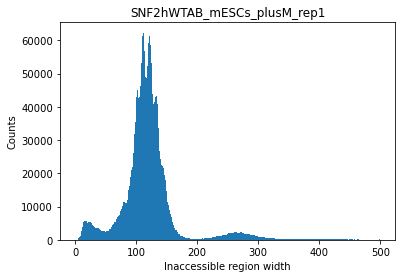

In [66]:
plt.hist(regWidths, bins=np.arange(0,500,1))
plt.xlabel('Inaccessible region width')
plt.ylabel('Counts')
plt.title(sampleRef['sampleName'][samp])

Text(0.5, 1.0, 'SNF2hWTAB_mESCs_plusM_rep1')

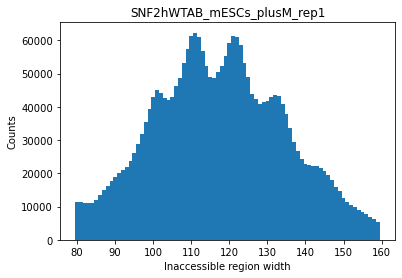

In [68]:
plt.hist(regWidths, bins=np.arange(79.5,160.5,1))
plt.xlabel('Inaccessible region width')
plt.ylabel('Counts')
plt.title(sampleRef['sampleName'][samp])

0

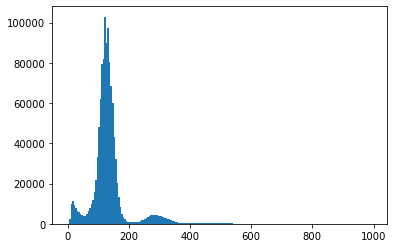

In [51]:
plt.hist(regWidths, bins=np.arange(0,1000,5))
0

## Looking at Widom 601 output
21/07/15

In [ ]:
amplicon = 'widom'
sampleRef =  pd.read_csv(dataPBase + 'pbrun3-9_SampleReference.csv')

hmmdat = {}
for samp in [3, 44, 45, 47, 48, 51, 52]:
    hmmfile = dataPBase + '{0}/processed/binarized/{0}_{1}_HMM.npy'.format(sampleRef['cell'][samp],
                                                                           sampleRef['sampleName'][samp])
    hmmdat[samp] = np.load(hmmfile)
    
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

plt.plot(np.mean(hmmdat[3], axis=0), label='chromatin')
plt.plot(np.mean(hmmdat[44], axis=0), label='negative')
plt.plot(np.mean(hmmdat[45], axis=0), label='positive')
plt.legend(bbox_to_anchor=(0.3, 1))
plt.xlabel('Position along molecule')
plt.ylabel('Fraction of molecules classified as accessible')

plt.plot(np.mean(hmmdat[3], axis=0), label='chromatin')
plt.plot(np.mean(hmmdat[52], axis=0), label='Snf2h + ATP')
plt.plot(np.mean(hmmdat[48], axis=0), label='RSC + ATP')
plt.legend(bbox_to_anchor=(0.3, 1))
plt.xlabel('Position along molecule')
plt.ylabel('Fraction of molecules classified as accessible')

In [ ]:
 
regions = {'zmw':[], 'length':[], 'start':[], 'end':[]}

for iz in tqdm(range(hmmdat.shape[0]), position=0, mininterval=1):
    try:
        hmm = hmmdat[iz,:]

        inacregion = hmm
        inacregion[np.isfinite(inacregion)] = inacregion[np.isfinite(inacregion)] > 0.5

        inacswitch = np.diff(inacregion)
        switchp = np.where(np.logical_or(inacswitch == 1, inacswitch == -1))[0]


        inInacReg = False
        regStart = -1
        regEnd = -1
        for point in switchp:
            if inacswitch[point] == -1 and not inInacReg:
                inInacReg = True
                regStart = point + 1
            if inacswitch[point] == 1 and inInacReg:
                inInacReg = False
                regEnd = point
                regions['zmw'].append(zmw)
                regions['length'].append(regEnd - regStart)
                regions['start'].append(regStart)
                regions['end'].append(regEnd)

    except KeyError:
        pass

regionD = pd.DataFrame(regions)

In [ ]:
goodL = regionD['length'][regionD['end'] < 1800]

plt.hist(goodL, np.arange(0,500,5))
plt.xlabel('inaccessible region width')
plt.ylabel('counts')

plt.figure()
plt.hist(goodL, np.arange(100,200,1))
plt.xlabel('inaccessible region width')
plt.ylabel('counts')

## Generate CSV of amplicon HMM results
21/07/16

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from tqdm import tqdm
import pickle
import os
import socket


if 'biochem1' in socket.gethostname():
    dataPBase = '/avicenna/vramani/analyses/pacbio/'
    figPBase = '/avicenna/cmcnally/pbanalysis/'
if 'titan' in socket.gethostname():
    dataPBase = '/data/users/goodarzilab/colin/results/pacbio/'
if 'wynton' in socket.gethostname():
    dataPBase = '/wynton/group/goodarzilab/ramanilab/results/pacbio/'
if 'rumi' in socket.gethostname():
    raise Exception('no pacbio results folder on rumi')
    
sampleRef = pd.read_csv(dataPBase + 'pbrun10_CTCFpool_2/pbrun10_CTCFpool_2.sampleReference.csv')
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + 'pbrun10_CTCFpool_1/pbrun10_CTCFpool_1.sampleReference.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210516_NA_SNF2hCTCFarray_ST_rep2/210516_NA_SNF2hCTCFarray_ST_rep2.sampleReference.wynton.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210520_NA_SNF2hCTCFarray_MT_rep1/210520_NA_SNF2hCTCFarray_MT_rep1.sampleReference.wynton.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210608_NA_SNF2hCTCFarray_MT_rep2/210608_NA_SNF2hCTCFarray_MT_rep2.sampleReference.wynton.csv')],
                      ignore_index=True)

del sampleRef['index'] 
    
    
sampleRef =  pd.read_csv(dataPBase + 'pbrun3-9_SampleReference.csv')


for samp in [3, 44, 45, 47, 48, 51, 52]:
    
#for samp in range(sampleRef.shape[0]):

    hmmFile = '{0}{1}/processed/binarized/{1}_{2}_HMM.npy'.format(dataPBase,
                                                                              sampleRef['cell'][samp],
                                                                              sampleRef['sampleName'][samp])
    hmmdat = np.load(hmmFile)

    regions = {'molecule':[], 'length':[], 'start':[], 'end':[]}

    for iz in tqdm(range(hmmdat.shape[0]), desc=str(samp), position=0, mininterval=1):
        hmm = hmmdat[iz,:]

        inacregion = hmm
        inacregion[np.isfinite(inacregion)] = inacregion[np.isfinite(inacregion)] > 0.5

        inacswitch = np.diff(inacregion)
        switchp = np.where(np.logical_or(inacswitch == 1, inacswitch == -1))[0]

        if len(switchp) < 1:
            if hmm[0] == 0:
                regions['molecule'].append(iz)
                regions['length'].append(len(hmm) - 0)
                regions['start'].append(np.nan)
                regions['end'].append(np.nan)
            continue
            
        if inacswitch[switchp[0]] == -1:
            inInacReg = False
            regStart = -1
            regEnd = -1
        if inacswitch[switchp[0]] == 1:
            inInacReg = True
            regStart = np.nan
            regEnd = -1
        for point in switchp:
            if inacswitch[point] == -1 and not inInacReg:
                inInacReg = True
                regStart = point + 1
            if inacswitch[point] == 1 and inInacReg:
                inInacReg = False
                regEnd = point
                regions['molecule'].append(iz)
                if np.isnan(regStart):
                    regions['length'].append(regEnd - 0)
                else:
                    regions['length'].append(regEnd - regStart)
                regions['start'].append(regStart)
                regions['end'].append(regEnd)
        if inInacReg:
            regions['molecule'].append(iz)
            regions['length'].append(len(hmm) - regStart)
            regions['start'].append(regStart)
            regions['end'].append(np.nan)

    regionD = pd.DataFrame(regions)

    if not os.path.exists(dataPBase + '%s/processed/inaccessibleRegions' % (sampleRef['cell'][samp])):
        os.makedirs(dataPBase + '%s/processed/inaccessibleRegions' % (sampleRef['cell'][samp]))

    regionD.to_csv(dataPBase + '{0}/processed/inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                                                  sampleRef['sampleName'][samp]))


44:  43%|████▎     | 21154/48836 [00:01<00:02, 12725.71it/s]


KeyboardInterrupt: 

In [17]:
regionD.iloc[0:30]

,molecule,length,start,end
0,0,140,267.0,407.0
1,0,92,693.0,785.0
2,0,98,1098.0,1196.0
3,0,31,1319.0,1350.0
4,0,44,1381.0,1425.0
5,0,27,1556.0,1583.0
6,0,107,1693.0,1800.0
7,0,159,1841.0,2000.0
8,0,182,2017.0,2199.0
9,0,46,2351.0,2397.0


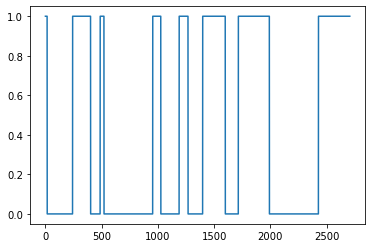

In [24]:
iz = 70
plt.plot(hmmdat[iz,:])

## Classify number of nucleosomes in each molecule
21/07/20

In [2]:
# CTCF sites

# load in reference sequences for both the independent and dependent CTCF sites
refFile = dataPBase + 'pbrun10_CTCFpool_2/snf2h_independent_site_observed.fasta'
for ir, record in enumerate(SeqIO.parse(refFile, 'fasta')):
    if ir > 0:
        raise InputError('Reference fasta has multiple entries')
    irefseq = record.seq # reference sequence for independent CTCF site
refFile = dataPBase + 'pbrun10_CTCFpool_2/snf2h_dependent_site_observed.fasta'
for ir, record in enumerate(SeqIO.parse(refFile, 'fasta')):
    if ir > 0:
        raise InputError('Reference fasta has multiple entries')
    drefseq = record.seq # reference sequence for dependent CTCF site

# Load in the sample reference tables for the CTCF site samples
sampleRef = pd.read_csv(dataPBase + 'pbrun10_CTCFpool_2/pbrun10_CTCFpool_2.sampleReference.csv')
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + 'pbrun10_CTCFpool_1/pbrun10_CTCFpool_1.sampleReference.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210516_NA_SNF2hCTCFarray_ST_rep2/210516_NA_SNF2hCTCFarray_ST_rep2.sampleReference.wynton.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210520_NA_SNF2hCTCFarray_MT_rep1/210520_NA_SNF2hCTCFarray_MT_rep1.sampleReference.wynton.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210608_NA_SNF2hCTCFarray_MT_rep2/210608_NA_SNF2hCTCFarray_MT_rep2.sampleReference.wynton.csv')],
                      ignore_index=True)

del sampleRef['index']

indepSamples = np.nonzero([(name[0:5] == 'Indep' or name[0:8] == 'CTCF_Ind') for name in sampleRef['sampleName']])[0]
depSamples = np.nonzero([(name[0:5] == 'Depen' or name[0:8] == 'CTCF_Dep') for name in sampleRef['sampleName']])[0]

In [5]:
print(len(irefseq))
print(len(drefseq))

2706
3087


In [3]:
regionAll = pd.DataFrame()
for samp in tqdm(indepSamples[2:], position=0):
    regionFile = dataPBase + '{0}/processed/inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                                                sampleRef['sampleName'][samp])
    regiondf = pd.read_csv(regionFile, index_col=0)

    regiondf['mid'] = regiondf['start'] + (regiondf['end'] - regiondf['start']) / 2
    regiondf['sample'] = samp
    
    regionAll = pd.concat([regionAll, regiondf])
    
regionAllInd = regionAll

regionAll = pd.DataFrame()
for samp in tqdm(depSamples[2:], position=0):
    regionFile = dataPBase + '{0}/processed/inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                                                sampleRef['sampleName'][samp])
    regiondf = pd.read_csv(regionFile, index_col=0)

    regiondf['mid'] = regiondf['start'] + (regiondf['end'] - regiondf['start']) / 2
    regiondf['sample'] = samp
    
    regionAll = pd.concat([regionAll, regiondf])
    
regionAllDep = regionAll

# load in widom
amplicon = 'widom'
sampleRef =  pd.read_csv(dataPBase + 'pbrun3-9_SampleReference.csv')

regionAll = pd.DataFrame()
for samp in tqdm([3, 47, 48, 51, 52], position=0):
    regionFile = dataPBase + '{0}/processed/inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                                                sampleRef['sampleName'][samp])
    regiondf = pd.read_csv(regionFile, index_col=0)

    regiondf['mid'] = regiondf['start'] + (regiondf['end'] - regiondf['start']) / 2
    regiondf['sample'] = samp
    
    regionAll = pd.concat([regionAll, regiondf])
    
regionAllWidom = regionAll

100%|██████████| 5/5 [00:00<00:00,  5.24it/s]


In [7]:
sampleRef = pd.read_csv(dataPBase + 'sampleRef_K562_mESC.csv', sep=',')

regionAll = pd.DataFrame()
for samp in tqdm([4,5,8,9,14,15,18,19,20,21,22,23,24,25,26,27], position=0):
    regionFile = dataPBase + '{0}/processed/inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                                                sampleRef['sampleName'][samp])
    regiondf = pd.read_csv(regionFile, index_col=0)

    regiondf['mid'] = regiondf['start'] + (regiondf['end'] - regiondf['start']) / 2
    regiondf['sample'] = samp
    
    regionAll = pd.concat([regionAll, regiondf])
    
regionAllmESC = regionAll

  0%|          | 0/16 [00:00<?, ?it/s]/avicenna/cmcnally/bin/miniconda2/envs/NN2/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
100%|██████████| 16/16 [00:10<00:00,  1.57it/s]


In [5]:
%matplotlib inline
matplotlib.rcParams['figure.dpi']= 150

regionAllAll = pd.concat([regionAllInd, regionAllDep, regionAllWidom, regionAllmESC])

NameError: name 'regionAllmESC' is not defined

In [81]:
sampleRef =  pd.read_csv(dataPBase + 'pbrun3-9_SampleReference.csv')
sampleRef.iloc[[3, 47, 48, 51, 52]]

,Unnamed: 0,index,cell,sampleName,unalignedSubreadsFile,ccsFile,alignedSubreadsFile,alignedCcsFile,reference,processed
3,3,3,pbrun4_gold,nuc47_chromatin,NaN,/avicenna/cmcnally/pbanalysis/data/PBRun_Gold....,/avicenna/cmcnally/pbanalysis/data/PBRun_Gold....,NaN,/avicenna/vramani/analyses/pacbio/pbrun3/47nt_...,NaN
47,47,47,pbrun6,RSC_47bp_minusATP_rep1,/avicenna/vramani/analyses/pacbio/pbrun6/pbrun...,/avicenna/vramani/analyses/pacbio/pbrun6/ccs/p...,/avicenna/vramani/analyses/pacbio/pbrun6/align...,/avicenna/vramani/analyses/pacbio/pbrun6/ccs/p...,/avicenna/vramani/analyses/pacbio/pbrun3/47nt_...,NaN
48,48,48,pbrun6,RSC_47bp_plusATP_rep1,/avicenna/vramani/analyses/pacbio/pbrun6/pbrun...,/avicenna/vramani/analyses/pacbio/pbrun6/ccs/p...,/avicenna/vramani/analyses/pacbio/pbrun6/align...,/avicenna/vramani/analyses/pacbio/pbrun6/ccs/p...,/avicenna/vramani/analyses/pacbio/pbrun3/47nt_...,NaN
51,51,51,pbrun6,Snf2h_47bp_minusATP_rep2,/avicenna/vramani/analyses/pacbio/pbrun6/pbrun...,/avicenna/vramani/analyses/pacbio/pbrun6/ccs/p...,/avicenna/vramani/analyses/pacbio/pbrun6/align...,/avicenna/vramani/analyses/pacbio/pbrun6/ccs/p...,/avicenna/vramani/analyses/pacbio/pbrun3/47nt_...,NaN
52,52,52,pbrun6,Snf2h_47bp_plusATP_rep2,/avicenna/vramani/analyses/pacbio/pbrun6/pbrun...,/avicenna/vramani/analyses/pacbio/pbrun6/ccs/p...,/avicenna/vramani/analyses/pacbio/pbrun6/align...,/avicenna/vramani/analyses/pacbio/pbrun6/ccs/p...,/avicenna/vramani/analyses/pacbio/pbrun3/47nt_...,NaN


In [249]:
regionAllAll.shape

(32065018, 7)

0

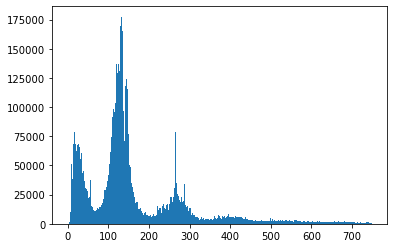

In [28]:
plt.hist(regionAll['length'], np.arange(0,750))
0

In [38]:
import smm
from scipy.stats import t

mix_t = smm.SMM(n_components=4, covariance_type='full', n_iter=1000, tol=1e-4)

mix_t.fit(regionAll['length'][0:100000].to_numpy().reshape([-1,1]))

SMM(n_components=4, tol=0.0001)

NameError: name 'mix_t' is not defined

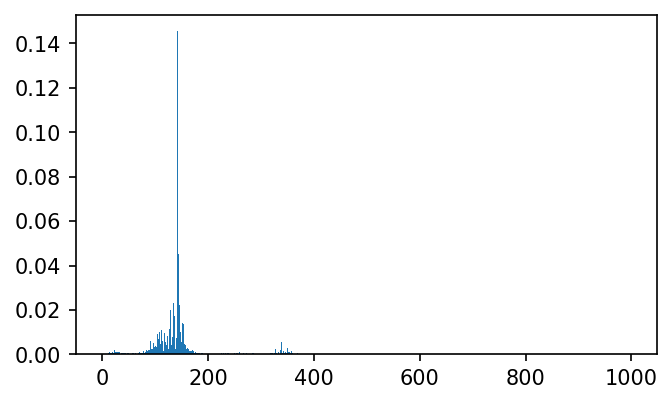

In [9]:
%matplotlib inline
matplotlib.rcParams['figure.dpi']= 150

x=np.arange(0,1000)

plt.figure(figsize=(5,3))
plt.hist(regionAll['length'][0:100000].to_numpy().reshape([-1,1]), x, density=True)
for comp in range(4):
    plt.plot(x, mix_t.weights[comp] * t.pdf(x, df=mix_t.degrees[comp], loc=mix_t.means[comp][0],
                                         scale=np.sqrt(mix_t.covariances[comp][0][0])))

In [ ]:
from sklearn.neighbors import KernelDensity

kd = KernelDensity(bandwidth = 50, kernel = 'tophat')
kd.fit(regionAll['length'].to_numpy().reshape(-1,1))

x = np.arange(0,2000)
kdpred = np.exp(kd.score_samples(x.reshape(-1,1)))

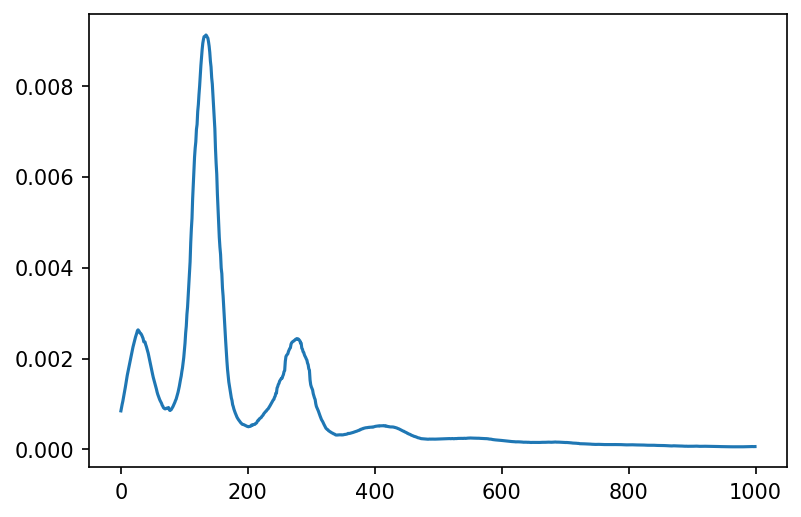

In [62]:
plt.plot(x, np.exp(kdpred))

In [86]:
regionAllWidom['length'][np.isin(regionAllWidom['sample'], [3, 48, 52])].shape

(892916,)

In [87]:
hist, bine = np.histogram(regionAllWidom['length'][np.isin(regionAllWidom['sample'], [3, 48, 52])], bins=np.arange(-0.5, 2000.5))
binc = bine[0:-1] + 0.5

smWidth = 50
smWidthH = int(smWidth / 2)
smoothv = [np.mean(hist[mc - smWidthH : mc + smWidthH]) for mc in np.arange(smWidthH, 2000-smWidthH, dtype='int')]
smoothv = np.array(smoothv)

centersmooth = binc[smWidthH:-smWidthH]

from scipy.signal import find_peaks

peaks, peakprop = find_peaks(-1 * smoothv, width=10)

(0.0, 5000.0)

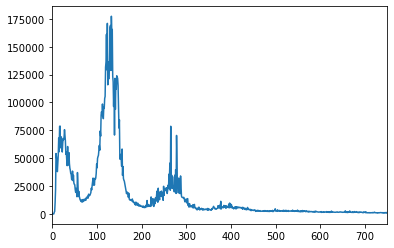

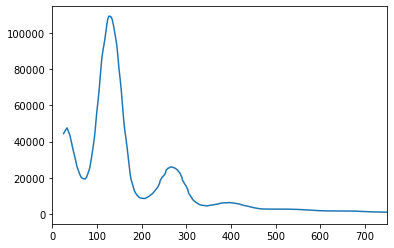

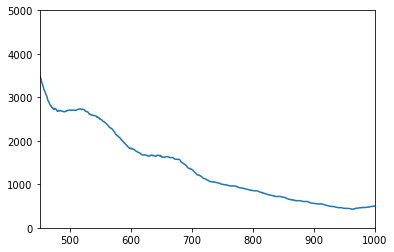

In [48]:
smWidth = 50
smWidthH = int(smWidth / 2)
smoothv = [np.mean(hist[mc - smWidthH : mc + smWidthH]) for mc in np.arange(smWidthH, 2000-smWidthH, dtype='int')]
smoothv = np.array(smoothv)

centersmooth = binc[smWidthH:-smWidthH]

plt.plot(binc, hist)
plt.xlim(0,750)

plt.figure()
plt.plot(binc[smWidthH:-smWidthH], smoothv)
plt.xlim(0,750)

plt.figure()
plt.plot(binc[smWidthH:-smWidthH], smoothv)
plt.xlim(450, 1000)
plt.ylim(0,5000)

In [49]:
from scipy.signal import find_peaks

peaks, peakprop = find_peaks(-1 * smoothv, width=10)

(0.0, 5000.0)

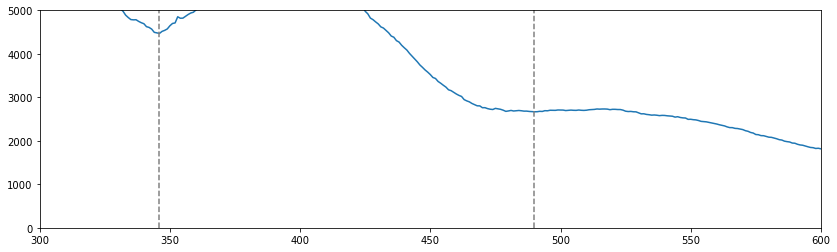

In [53]:
plt.figure(figsize=(14,4))
plt.plot(binc[smWidthH:-smWidthH], smoothv)
for p in peaks:
    plt.axvline(x=binc[smWidthH:-smWidthH][p], ls='--', color='gray')
plt.xlim(300,600)
plt.ylim(0,5000)


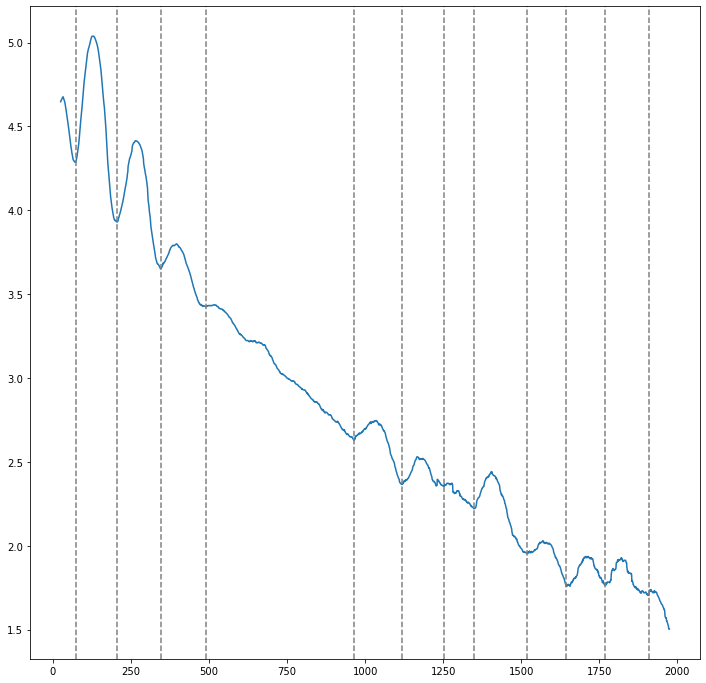

In [60]:
plt.figure(figsize=(12,12))
plt.plot(centersmooth, np.log10(smoothv))
for p in peaks:
    plt.axvline(x=centersmooth[p], ls='--', color='gray')

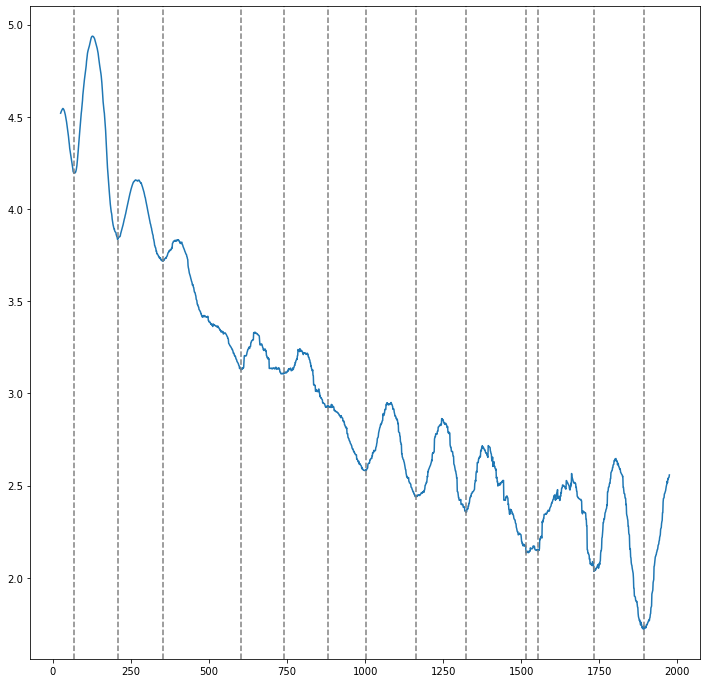

In [64]:
plt.figure(figsize=(12,12))
plt.plot(centersmooth, np.log10(smoothv))
for p in peaks:
    plt.axvline(x=centersmooth[p], ls='--', color='gray')

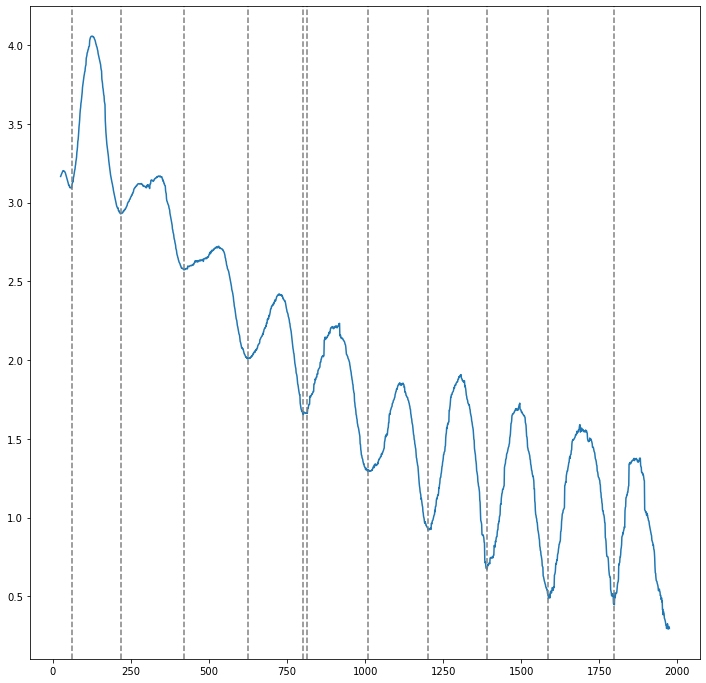

In [67]:
plt.figure(figsize=(12,12))
plt.plot(centersmooth, np.log10(smoothv))
for p in peaks:
    plt.axvline(x=centersmooth[p], ls='--', color='gray')

In [12]:
hist, bine = np.histogram(regionAllmESC['length'], bins=np.arange(-0.5, 2000.5))
binc = bine[0:-1] + 0.5

smWidth = 50
smWidthH = int(smWidth / 2)
smoothv = [np.mean(hist[mc - smWidthH : mc + smWidthH]) for mc in np.arange(smWidthH, 2000-smWidthH, dtype='int')]
smoothv = np.array(smoothv)

centersmooth = binc[smWidthH:-smWidthH]

from scipy.signal import find_peaks

peaks, peakprop = find_peaks(-1 * smoothv, width=10, distance=100)


plt.figure(figsize=(6,4))
plt.plot(centersmooth, np.log10(smoothv))
for p in peaks:
    plt.axvline(x=centersmooth[p], ls='--', color='gray')

NameError: name 'regionAllmESC' is not defined

Text(0, 0.5, 'smoothed first derivative of smoothed counts')

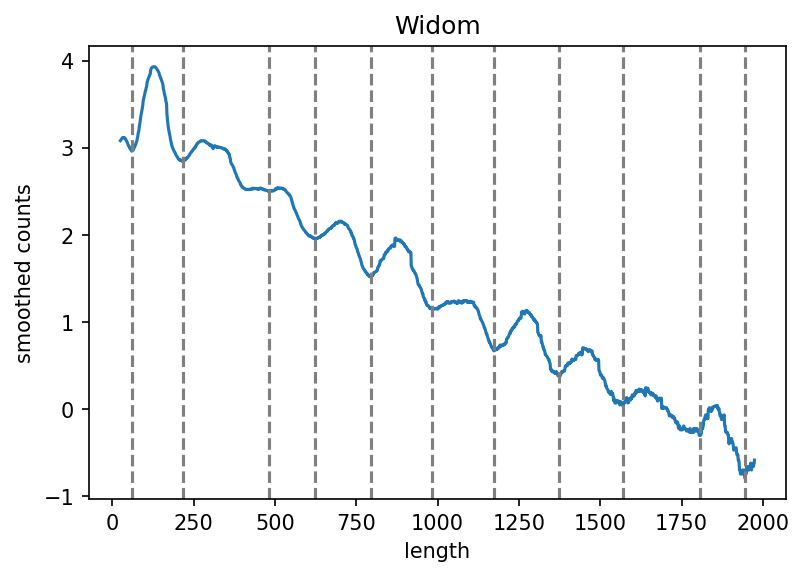

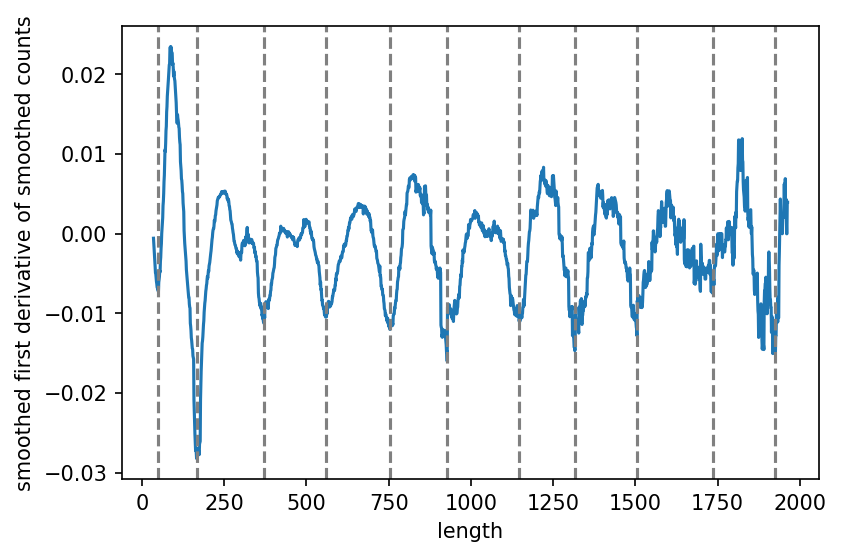

In [108]:
hist, bine = np.histogram(regionAllWidom['length'][np.isin(regionAllWidom['sample'], [3, 48, 52])], bins=np.arange(-0.5, 2000.5))
binc = bine[0:-1] + 0.5

smWidth = 50
smWidthH = int(smWidth / 2)
smoothv = [np.mean(hist[mc - smWidthH : mc + smWidthH]) for mc in np.arange(smWidthH, 2000-smWidthH, dtype='int')]
smoothv = np.array(smoothv)

centersmooth = binc[smWidthH:-smWidthH]

from scipy.signal import find_peaks

peaks, peakprop = find_peaks(-1 * smoothv, width=10, distance=100)


plt.figure(figsize=(6,4))
plt.plot(centersmooth, np.log10(smoothv))
for p in peaks:
    plt.axvline(x=centersmooth[p], ls='--', color='gray')
plt.title('Widom')
plt.xlabel('length')
plt.ylabel('smoothed counts')

a = np.diff(np.log10(smoothv))
b = np.array([np.mean(a[x-10:x+10]) for x in np.arange(10, len(a)-10)])
peaksb, peakpropb = find_peaks(-1 * b, width=10, distance=100)
plt.figure(figsize=(6,4))
plt.plot(centersmooth[10:-11], b)
for p in peaksb:
    plt.axvline(x=centersmooth[10:-11][p], ls='--', color='gray')
plt.xlabel('length')
plt.ylabel('smoothed first derivative of smoothed counts')





In [95]:
a.shape

(1949,)

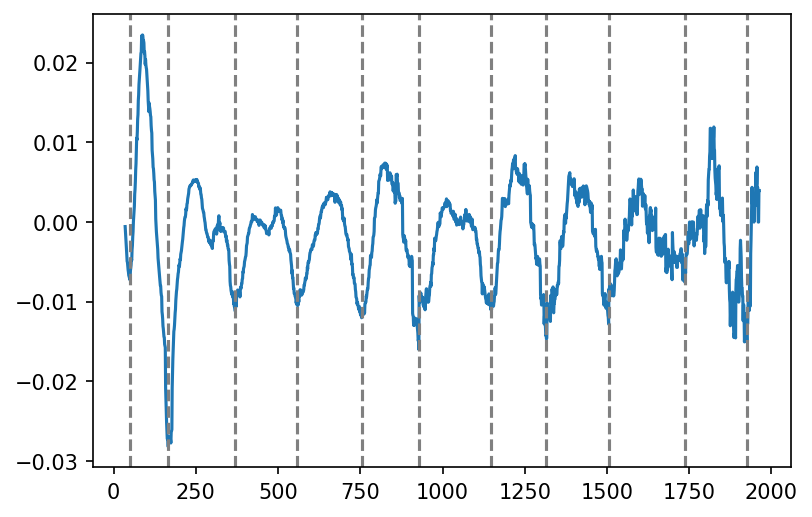

In [104]:
a = np.diff(np.log10(smoothv))
b = np.array([np.mean(a[x-10:x+10]) for x in np.arange(10, len(a)-10)])
peaksb, peakpropb = find_peaks(-1 * b, width=10, distance=100)
plt.plot(centersmooth[10:-11], b)
for p in peaksb:
    plt.axvline(x=centersmooth[10:-11][p], ls='--', color='gray')

In [80]:
print(centersmooth[peaks[0:10]])

print(np.diff(centersmooth[peaks[0:10]]))

[  47.  207.  383.  814.  984. 1226. 1230. 1233. 1369. 1377.]
[160. 176. 431. 170. 242.   4.   3. 136.   8.]


In [61]:
print(centersmooth[peaks[0:10]])

print(np.diff(centersmooth[peaks[0:10]]))

[  73.  206.  346.  490.  964. 1118. 1253. 1349. 1519. 1644.]
[133. 140. 144. 474. 154. 135.  96. 170. 125.]


In [132]:
from sklearn.mixture import BayesianGaussianMixture
from scipy import interpolate

hv = interpolate.splrep(binc, np.log10(hist))


<ipython-input-132-bcd1d4cc43a6>:4: RuntimeWarning: divide by zero encountered in log10
  hv = interpolate.splrep(binc, np.log10(hist))


In [135]:
isf = np.isfinite(np.log10(hist))
hv = interpolate.splrep(binc[isf], np.log10(hist)[isf])

<ipython-input-135-fd1dc6b6870c>:1: RuntimeWarning: divide by zero encountered in log10
  isf = np.isfinite(np.log10(hist))
<ipython-input-135-fd1dc6b6870c>:2: RuntimeWarning: divide by zero encountered in log10
  hv = interpolate.splrep(binc[isf], np.log10(hist)[isf])


<ipython-input-203-804262074b16>:23: RuntimeWarning: divide by zero encountered in log10
  plt.plot(binc, np.log10(hist), '.', ms=1)


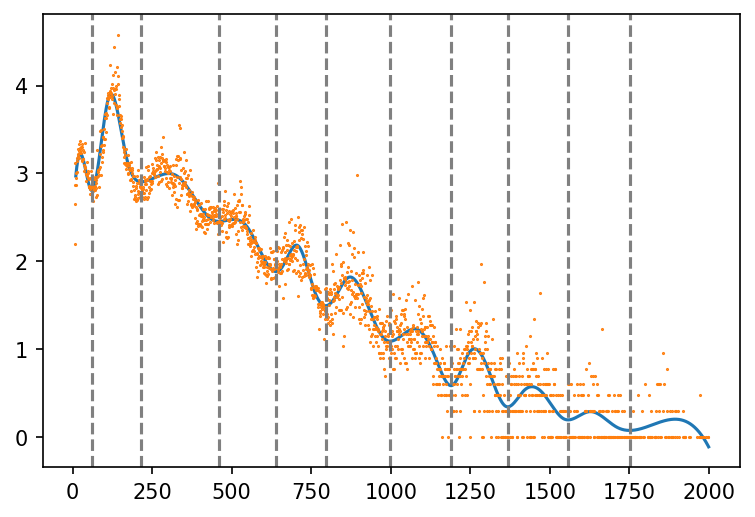

In [203]:
import warnings

regiondf = {'widom':regionAllWidom['length'][np.isin(regionAllWidom['sample'], [3, 48, 52])],
            'ind':regionAllInd['length'],
            'dep':regionAllDep['length']}

molecule = 'widom'

hist, bine = np.histogram(regiondf[molecule], bins=np.arange(-0.5, 2000.5))
binc = bine[0:-1] + 0.5

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    isf = np.isfinite(np.log10(hist))
    tck = interpolate.splrep(x=binc[isf], y=np.log10(hist)[isf], s=80)

xtest = np.arange(10,2000)
ytest = interpolate.splev(xtest, tck, der=0)

peaks, peakprop = find_peaks(-1 * ytest, width=10, distance=10)

plt.plot(xtest, ytest)
plt.plot(binc, np.log10(hist), '.', ms=1)
for p in peaks:
    plt.axvline(x=xtest[p], ls='--', color='gray')

#plt.figure(figsize=(4,2))
#plt.plot(np.diff(np.diff(ytest)))

In [206]:
bgmm = BayesianGaussianMixture(n_components=12)
bgmm.fit(regionAllWidom['length'].to_numpy().reshape(-1,1))

/avicenna/cmcnally/bin/miniconda2/envs/NN2/lib/python3.8/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


BayesianGaussianMixture(n_components=12)

In [215]:
bgmm.weights_

array([0.35452428, 0.0053462 , 0.06540885, 0.00394119, 0.01517232,
       0.08698563, 0.01091899, 0.05573378, 0.12380716, 0.02167056,
       0.25205224, 0.0044388 ])

(0.0, 0.005)

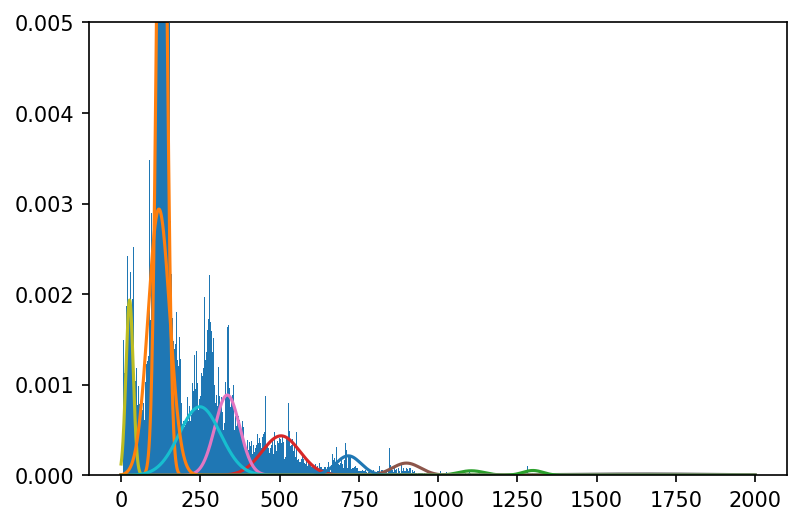

In [221]:
from scipy.stats import norm

ncomp = bgmm.means_.shape[0]
xplot = np.arange(0,2001).reshape(-1,1)
plt.hist(regiondf[molecule], bins=np.arange(-0.5, 2000.5), density=True)
for comp in range(ncomp):
    plt.plot(xplot, bgmm.weights_[comp]*norm.pdf(xplot, loc=bgmm.means_[comp][0], scale=np.sqrt(bgmm.covariances_[comp])))
plt.ylim(0,.005)

In [208]:
plt.hist(usedat, np.linspace(-1, 1.5, 50), density=True)
for comp, col in [(0,'orange'), (1,'red')]:
    ax[int(figind / figw), figind % figw].plot(x, gmmFitd[b].weights_[comp]*norm.pdf(x, loc=gmmFitd[b].means_[comp][0], scale=np.sqrt(gmmFitd[b].covariances_[comp])), color=col)

array([[ 128.51294763],
       [1105.00515682],
       [ 504.54997522],
       [2244.97680071],
       [ 900.22741023],
       [ 335.02448553],
       [1644.2014477 ],
       [  26.85156636],
       [ 248.73436074],
       [ 716.96996154],
       [ 119.43948724],
       [1299.20848778]])

<ipython-input-201-66b384bf1e30>:14: RuntimeWarning: divide by zero encountered in log10
  plt.plot(binc, np.log10(hist), '.', ms=1)


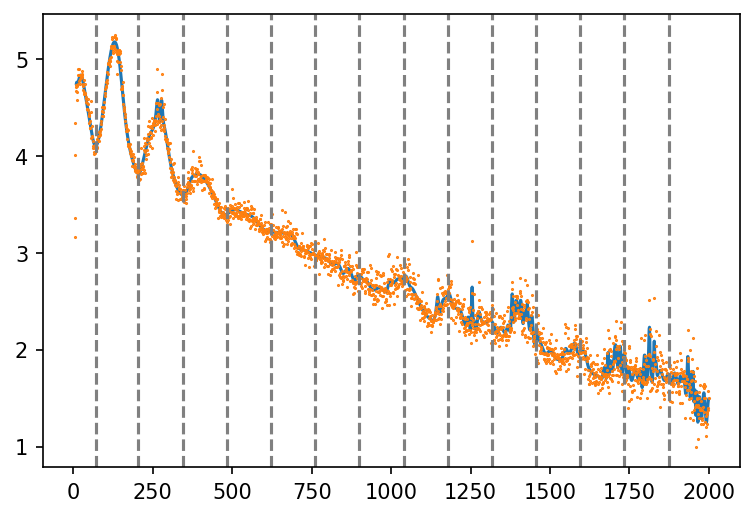

In [201]:
p0 = xtest[peaks[0]]
p1 = xtest[peaks[1]]
p2 = xtest[peaks[2]]

divs = [p0, p1, p2]
pdiff = p2 - p1
pnext = p2 + pdiff
while pnext < 2000:
    divs.append(pnext)
    pnext += pdiff
divs = np.array(divs)

plt.plot(xtest, ytest)
plt.plot(binc, np.log10(hist), '.', ms=1)
for p in divs:
    plt.axvline(x=p, ls='--', color='gray')


<ipython-input-193-7029f912ebfa>:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(binc, np.log10(hist), '.', ms=1)


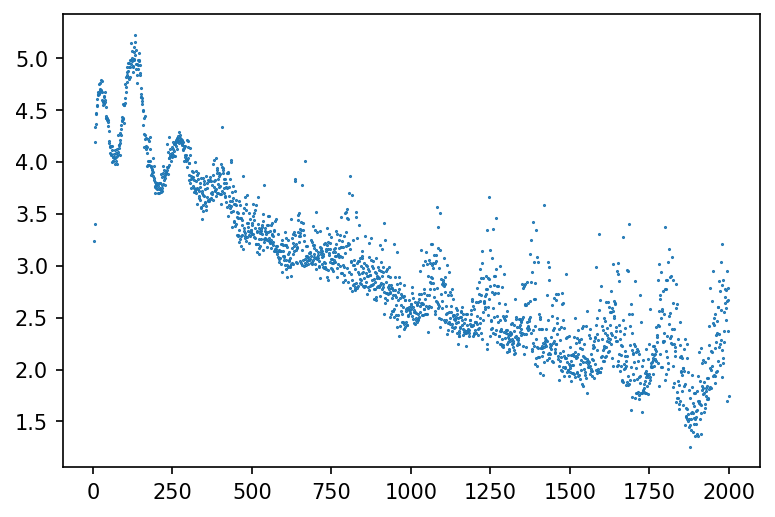

In [193]:
plt.plot(binc, np.log10(hist), '.', ms=1)

In [128]:

from scipy import fft

fftout = fft.fft(smoothv)

In [ ]:
plt.plot(fftout)
#plt.xlim(40,200)

In [ ]:
plt.plot(fftout.real, fftout.imag)

In [ ]:
grad = np.gradient(np.log10(hist))

plt.plot(grad)

In [7]:
hist[0:10]

array([   nan,    nan,    nan,    nan,  1476.,  2273., 10348., 22002.,
       53975., 51051.])

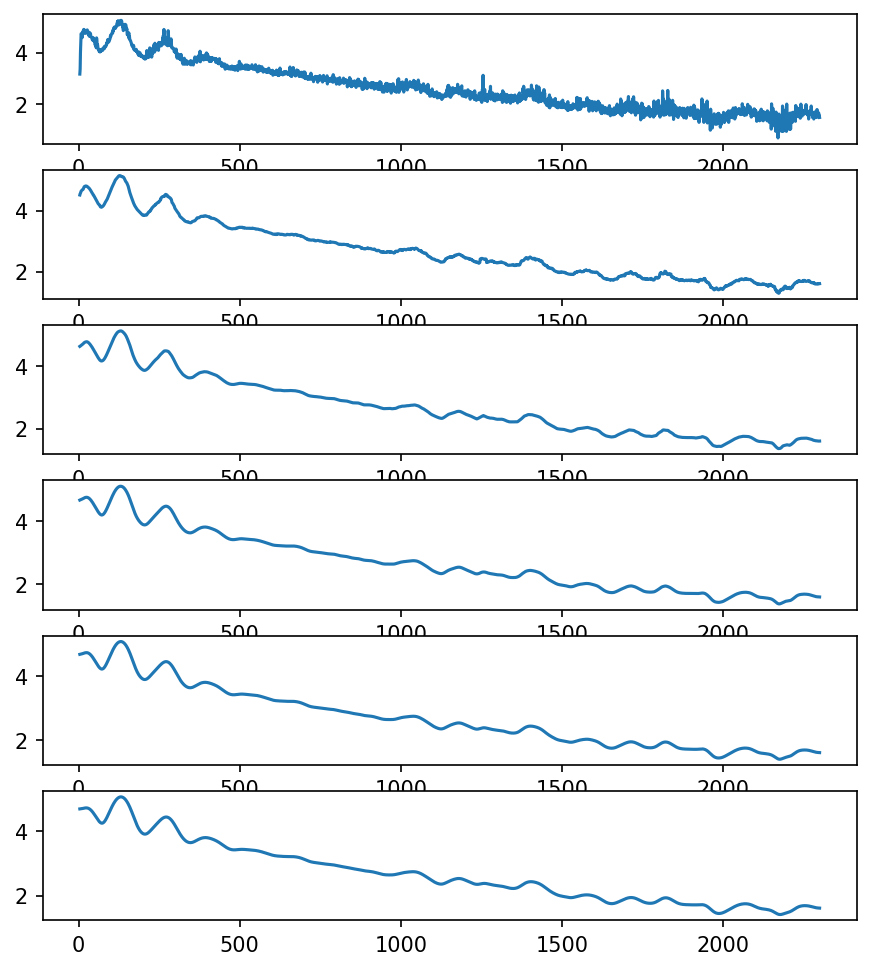

In [6]:
from scipy.signal import find_peaks

regiondf = {'widom':regionAllWidom['length'][np.isin(regionAllWidom['sample'], [3, 48, 52])],
            'ind':regionAllInd['length'],
            'dep':regionAllDep['length']}#,
            #'all':regionAllAll['length'],
            #'mesc':regionAllmESC['length']}

molecule = 'ind'

hist, bine = np.histogram(regiondf[molecule], bins=np.arange(-0.5, 2300.5))
binc = bine[0:-1] + 0.5

hist = hist.astype('float')
ix = 0
while hist[ix] == 0:
    hist[ix] = np.nan
    ix += 1
    
smWidth = 21
smWidthH = int((smWidth-1) / 2)
smooths = []

def smooth1time(inp):
    smoothlast = inp.copy()
    smoothn = inp.copy()
    for windc in np.arange(0,2300)[np.isfinite(inp)]:
        windlow = max(0, windc - smWidthH)
        windhigh = min(2300, windc + smWidthH)
        smoothn[windc] = np.nanmean(smoothlast[windlow:windhigh])
    return smoothn

smoothc = hist.copy()
for i in range(10):
    smoothc = smooth1time(smoothc)
    smooths.append(smoothc)

fig, ax = plt.subplots(6,1, figsize=(7,8))
ax[0].plot(np.log10(hist))
for i in range(5):
    ax[i+1].plot(np.log10(smooths[i]))

In [11]:
binc[peaks+4]

array([  72.,  205.,  346.,  480.,  644.,  973., 1125., 1235., 1346.,
       1527., 1654., 1773., 1986., 2174.])

Text(0.5, 1.0, 'independent CTCF site')

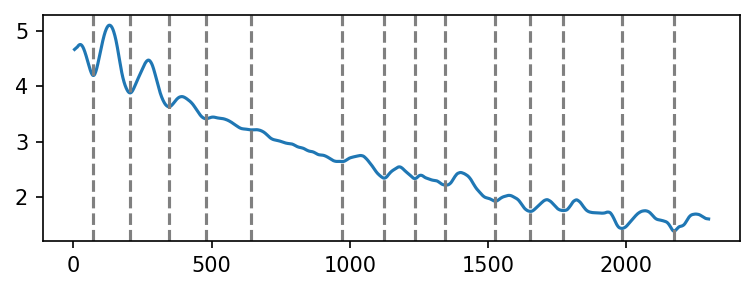

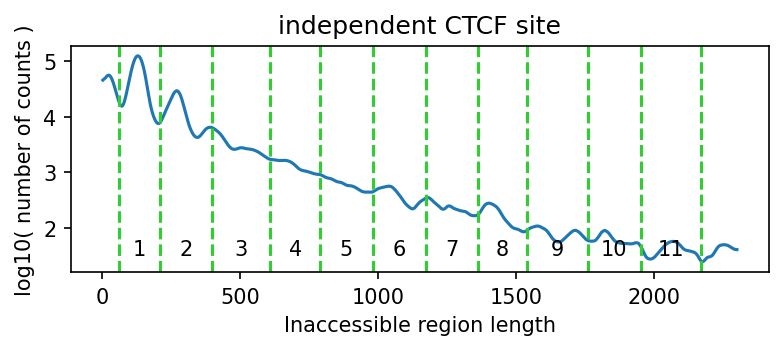

In [13]:
usesm = smooths[2]
plt.figure(figsize=(6,2))
plt.plot(binc, np.log10(usesm))
peaks, peakprop = find_peaks(-1 * np.log10(usesm[4:]), width=10, distance=80)
for p in peaks:
    plt.axvline(x=binc[p+4], ls='--', color='gray')
    
divs = [67, 207, 350, 480, 610, 750, 885, 980, 1130]
divsmesc = [50, 200, 370, 500, 630, 800, 970, 1090, 1200]
divswidom = [64, 210, 400, 610, 790, 980, 1175, 1360, 1540, 1760, 1950, 2170]
divsind = [70, 205, 340, 475, 610, 780, 950, 1120, 1300, 1500, 1650, 1770, 1980, 2170, 2350, 2520, 2660]
divsdep = [70, 205, 345, 470, 605, 740, 880, 1005, 1175, 1320, 1500, 1740, 1890, 2035, 2180, 2310, 2480, 2740, 2870, 3000]
plt.figure(figsize=(6,2))
plt.plot(binc, np.log10(usesm))
usedivs = divswidom
for p in usedivs:
    plt.axvline(x=p, ls='--', color='limegreen')
for i in range(len(usedivs)-1):
    midp = usedivs[i] + (usedivs[i+1] - usedivs[i])/2
    plt.text(y=1.5, x=midp, s=str(i+1), ha='center')
plt.xlabel('Inaccessible region length')
plt.ylabel('log10( number of counts )')
plt.title('independent CTCF site')

In [6]:
np.diff(usedivs)

NameError: name 'usedivs' is not defined

In [57]:
17 * 147

2499

In [7]:
samp = 20
divsmesc = np.array([50, 200, 370, 500, 630, 800, 970, 1090, 1200])
sampleRef = pd.read_csv(dataPBase + 'sampleRef_K562_mESC.csv', sep=',')

zmwinfoFile = '{0}{1}/processed/full/{1}_{2}_full_zmwinfo.pickle'.format(dataPBase,
                                                                          sampleRef['cell'][samp],
                                                                          sampleRef['sampleName'][samp])


zmwinfo = pd.read_pickle(zmwinfoFile)
zmwinfo.set_index('zmw', inplace=True)

In [11]:
zmwinfo['cclen'][14]

1206

In [2]:
# generate output for mESC

molecule = 'mESC'

if molecule == 'mESC':
    divsmesc = np.array([50, 200, 370, 500, 630, 800, 970, 1090, 1200])
    sampleRef = pd.read_csv(dataPBase + 'sampleRef_K562_mESC.csv', sep=',')
    #usesamples = [4,5,8,9,14,15,18,19,20,21,22,23,24,25,26,27]
    #usesamples = [30,31,32,33,34,35,36]
    usesamples = [37,38,40,41,42,44,45,46,48]


#usesamples = [18]
for samp in tqdm(usesamples, position=0):

    zmwinfoFile = '{0}{1}/processed/full/{1}_{2}_full_zmwinfo.pickle'.format(dataPBase,
                                                                              sampleRef['cell'][samp],
                                                                              sampleRef['sampleName'][samp])


    zmwinfo = pd.read_pickle(zmwinfoFile)
    zmwinfo.set_index('zmw', inplace=True)
    zmwinfo.drop_duplicates(inplace=True) # remove duplicate entries
    hmmFile = '{0}{1}/processed/binarized/{1}_{2}_NNsingle_HMM.pickle'.format(dataPBase,
                                                                  sampleRef['cell'][samp],
                                                                  sampleRef['sampleName'][samp])
    with open(hmmFile, 'rb') as fin:
        hmmdat = pickle.load(fin)

    regionFile = dataPBase + '{0}/processed/inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                                                    sampleRef['sampleName'][samp])
    regiondf = pd.read_csv(regionFile, index_col=0)



    densityD = {'zmw':[], 'numRegions':[], 'nucs':[], 'subnucs':[], 'moleculeLength':[], 'calledLength':[], 'fracInaccessible':[], 'overnucs':[]}

    doneZMW = []
    curZMW = None
    for ir in np.arange(regiondf.shape[0]):
        if regiondf['zmw'][ir] != curZMW:
            if curZMW is not None:
                curNs = np.array(curNs)
                densityD['zmw'].append(curZMW)
                doneZMW.append(curZMW)
                densityD['subnucs'].append(np.sum(curNs == 0))
                densityD['overnucs'].append(np.sum(curNs == 9))
                densityD['numRegions'].append(len(curNs))
                densityD['nucs'].append(np.sum(curNs[curNs < 9]))
                densityD['moleculeLength'].append(zmwinfo['cclen'][curZMW])

                hmm = hmmdat[curZMW]
                densityD['calledLength'].append(np.sum(np.isfinite(hmm)))
                inacregion = hmm
                inacregion[np.isfinite(inacregion)] = inacregion[np.isfinite(inacregion)] > 0.5
                densityD['fracInaccessible'].append(np.sum(inacregion == 0) / np.sum(np.isfinite(inacregion)))

            curZMW = regiondf['zmw'][ir]
            curNs = []
        thislength = regiondf['length'][ir]
        thisnucs = np.sum(thislength > divsmesc)
        curNs.append(thisnucs)
    # now do last molecule
    curNs = np.array(curNs)
    densityD['zmw'].append(curZMW)
    doneZMW.append(curZMW)
    densityD['subnucs'].append(np.sum(curNs == 0))
    densityD['overnucs'].append(np.sum(curNs == 9))
    densityD['numRegions'].append(len(curNs))
    densityD['nucs'].append(np.sum(curNs[curNs < 9]))
    densityD['moleculeLength'].append(zmwinfo['cclen'][curZMW])

    hmm = hmmdat[curZMW]
    densityD['calledLength'].append(np.sum(np.isfinite(hmm)))
    inacregion = hmm
    inacregion[np.isfinite(inacregion)] = inacregion[np.isfinite(inacregion)] > 0.5
    densityD['fracInaccessible'].append(np.sum(inacregion == 0) / np.sum(np.isfinite(inacregion)))
                
    # add any missing molecules that had zero inaccessible regions
    doneZMW = np.array(doneZMW)
    allzmw = np.array(list(hmmdat.keys())) #zmwinfo.index.to_numpy()
    missingZMW = allzmw[~np.isin(allzmw, doneZMW)]
    for uzmw in missingZMW:
        densityD['zmw'].append(uzmw)
        densityD['subnucs'].append(0)
        densityD['overnucs'].append(0)
        densityD['numRegions'].append(0)
        densityD['nucs'].append(0)
        densityD['moleculeLength'].append(zmwinfo['cclen'][uzmw])

        hmm = hmmdat[uzmw]
        densityD['calledLength'].append(np.sum(np.isfinite(hmm)))
        inacregion = hmm
        inacregion[np.isfinite(inacregion)] = inacregion[np.isfinite(inacregion)] > 0.5
        densityD['fracInaccessible'].append(np.sum(inacregion == 0) / np.sum(np.isfinite(inacregion)))
        
    densityDF = pd.DataFrame(densityD)
    densityDF.set_index('zmw', inplace=True)
    densityDF.sort_index(axis='index', inplace=True)
    
    if not os.path.exists(dataPBase + '%s/processed/density' % (sampleRef['cell'][samp])):
            os.makedirs(dataPBase + '%s/processed/density' % (sampleRef['cell'][samp]))

    densityFile = dataPBase + '{0}/processed/density/{0}_{1}_density.csv'.format(sampleRef['cell'][samp],
                                                                                                    sampleRef['sampleName'][samp])
    densityDF.to_csv(densityFile) #,
                     #columns=['zmw', 'numRegions', 'nucs', 'subnucs', 'overnucs', 'moleculeLength', 'calledLength', 'fracInaccessible'])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [37:41<00:00, 251.25s/it]


In [13]:
densityDF

,numRegions,nucs,subnucs,moleculeLength,calledLength,fracInaccessible,overnucs
zmw,,,,,,,
14,5,6,0,1206,1199,0.674729,0
17,7,7,2,1532,1523,0.583060,0
18,6,6,0,1225,1218,0.589491,0
23,9,9,1,1747,1733,0.746105,0
29,5,6,0,1038,1031,0.696411,0
...,...,...,...,...,...,...,...
180554555,8,9,0,1887,1880,0.578191,0
180554576,6,5,2,1087,1073,0.589003,0
180554578,5,5,0,1001,988,0.540486,0


In [45]:
zmwinfoDD = zmwinfo.drop_duplicates()

In [46]:
print(zmwinfo.shape)
print(zmwinfoDD.shape)

(681953, 12)
(679108, 12)


In [42]:
a = zmwinfo.duplicated()

In [44]:
np.sum(a)

2845

In [36]:
densityDF.iloc[i]

numRegions                                                          8
nucs                                                                8
subnucs                                                             0
moleculeLength      zmw
140050433    832
140050433    832
Name: cc...
calledLength                                                      820
fracInaccessible                                             0.541463
overnucs                                                            0
Name: 140050433, dtype: object

In [33]:
densityDF.iloc[i]['moleculeLength']

zmw
140050433    832
140050433    832
Name: cclen, dtype: int64

In [30]:
for i in tqdm(range(densityDF.shape[0])):
    a = float(densityDF.iloc[i]['moleculeLength']) / 2 + 15


 75%|████████████████████████████████████████████████████████████████▎                     | 508155/679108 [01:25<00:28, 5947.12it/s]


TypeError: cannot convert the series to <class 'float'>

In [25]:
densityWrote = pd.read_csv(densityFile, index_col='zmw')

/avicenna/cmcnally/bin/miniconda2/envs/NN2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [27]:
densityWrote.dtypes

numRegions            int64
nucs                  int64
subnucs               int64
moleculeLength       object
calledLength          int64
fracInaccessible    float64
overnucs              int64
dtype: object

In [100]:
regiondf.loc[regiondf['zmw'] == 134152979]

,zmw,length,start,end
588666,134152979,122,48.0,170.0
588667,134152979,122,230.0,352.0
588668,134152979,112,409.0,521.0
588669,134152979,146,549.0,695.0
588670,134152979,248,731.0,979.0


In [75]:
print(len(doneZMW))
print(zmwinfo.shape[0])

doneZMW = np.array(doneZMW)

allzmw = zmwinfo.index.to_numpy()

a = allzmw[~np.isin(allzmw, doneZMW)]

184142
185870


In [4]:
a = (1/3 + (2/3)*(1/3))
a + (1-a)*a

0.8024691358024691

In [86]:
regionFile
regiondf = pd.read_csv(regionFile, index_col=0)

regiondf

,zmw,length,start,end


In [63]:
# generate output for amplicons
molecule = 'ind'

if molecule == 'widom':
    divswidom = [64, 210, 400, 610, 790, 980, 1175, 1360, 1540, 1760, 1950, 2170]
    usedivs = divswidom
    sampleRef =  pd.read_csv(dataPBase + 'pbrun3-9_SampleReference.csv')
    usesamples = [3, 47, 48, 51, 52]
    refLength = 2268
if molecule == 'ind':
    divsind = [70, 205, 340, 475, 610, 780, 950, 1120, 1300, 1500, 1650, 1770, 1980, 2170, 2350, 2520, 2660]
    usedivs = divsind
    sampleRef = pd.read_csv(dataPBase + 'pbrun10_CTCFpool_2/pbrun10_CTCFpool_2.sampleReference.csv')
    sampleRef = pd.concat([sampleRef,
                           pd.read_csv(dataPBase + 'pbrun10_CTCFpool_1/pbrun10_CTCFpool_1.sampleReference.csv')],
                          ignore_index=True)
    sampleRef = pd.concat([sampleRef,
                           pd.read_csv(dataPBase + '210516_NA_SNF2hCTCFarray_ST_rep2/210516_NA_SNF2hCTCFarray_ST_rep2.sampleReference.wynton.csv')],
                          ignore_index=True)
    sampleRef = pd.concat([sampleRef,
                           pd.read_csv(dataPBase + '210520_NA_SNF2hCTCFarray_MT_rep1/210520_NA_SNF2hCTCFarray_MT_rep1.sampleReference.wynton.csv')],
                          ignore_index=True)
    sampleRef = pd.concat([sampleRef,
                           pd.read_csv(dataPBase + '210608_NA_SNF2hCTCFarray_MT_rep2/210608_NA_SNF2hCTCFarray_MT_rep2.sampleReference.wynton.csv')],
                          ignore_index=True)
    del sampleRef['index']
    indepSamples = np.nonzero([(name[0:5] == 'Indep' or name[0:8] == 'CTCF_Ind') for name in sampleRef['sampleName']])[0]
    usesamples = indepSamples[2:]
    refLength = 2706
    
elif molecule == 'dep':
    divsdep = [70, 205, 345, 470, 605, 740, 880, 1005, 1175, 1320, 1500, 1740, 1890, 2035, 2180, 2310, 2480, 2740, 2870, 3000]
    usedivs = divsdep
    refLength = 3087
    sampleRef = pd.read_csv(dataPBase + 'pbrun10_CTCFpool_2/pbrun10_CTCFpool_2.sampleReference.csv')
    sampleRef = pd.concat([sampleRef,
                           pd.read_csv(dataPBase + 'pbrun10_CTCFpool_1/pbrun10_CTCFpool_1.sampleReference.csv')],
                          ignore_index=True)
    sampleRef = pd.concat([sampleRef,
                           pd.read_csv(dataPBase + '210516_NA_SNF2hCTCFarray_ST_rep2/210516_NA_SNF2hCTCFarray_ST_rep2.sampleReference.wynton.csv')],
                          ignore_index=True)
    sampleRef = pd.concat([sampleRef,
                           pd.read_csv(dataPBase + '210520_NA_SNF2hCTCFarray_MT_rep1/210520_NA_SNF2hCTCFarray_MT_rep1.sampleReference.wynton.csv')],
                          ignore_index=True)
    sampleRef = pd.concat([sampleRef,
                           pd.read_csv(dataPBase + '210608_NA_SNF2hCTCFarray_MT_rep2/210608_NA_SNF2hCTCFarray_MT_rep2.sampleReference.wynton.csv')],
                          ignore_index=True)
    del sampleRef['index']
    depSamples = np.nonzero([(name[0:5] == 'Depen' or name[0:8] == 'CTCF_Dep') for name in sampleRef['sampleName']])[0]
    usesamples = depSamples[2:]

for samp in tqdm(usesamples, position=0):

    hmmFile = '{0}{1}/processed/binarized/{1}_{2}_HMM.npy'.format(dataPBase,
                                                                  sampleRef['cell'][samp],
                                                                  sampleRef['sampleName'][samp])
    hmmdat = np.load(hmmFile)

    regionFile = dataPBase + '{0}/processed/inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                                                    sampleRef['sampleName'][samp])
    regiondf = pd.read_csv(regionFile, index_col=0)



    densityD = {'molecule':[], 'numRegions':[], 'nucs':[], 'subnucs':[], 'moleculeLength':[], 'calledLength':[], 'fracInaccessible':[], 'overnucs':[]}

    moleculeDone = np.zeros(hmmdat.shape[0], dtype='int')
    curMol = None
    for ir in np.arange(regiondf.shape[0]):
        if regiondf['molecule'][ir] != curMol:
            if curMol is not None:
                curNs = np.array(curNs)
                densityD['molecule'].append(curMol)
                moleculeDone[curMol] = 1
                densityD['subnucs'].append(np.sum(curNs == 0))
                densityD['overnucs'].append(np.sum(curNs == len(usedivs)))
                densityD['numRegions'].append(len(curNs))
                densityD['nucs'].append(np.sum(curNs))
                densityD['moleculeLength'].append(refLength)

                hmm = hmmdat[curMol,:]
                densityD['calledLength'].append(np.sum(np.isfinite(hmm)))
                inacregion = hmm
                inacregion[np.isfinite(inacregion)] = inacregion[np.isfinite(inacregion)] > 0.5
                densityD['fracInaccessible'].append(np.sum(inacregion == 0) / np.sum(np.isfinite(inacregion)))

            curMol = regiondf['molecule'][ir]
            curNs = []
        thislength = regiondf['length'][ir]
        thisnucs = np.sum(thislength > usedivs)
        curNs.append(thisnucs)
    # now do last molecule
    curNs = np.array(curNs)
    densityD['molecule'].append(curMol)
    moleculeDone[curMol] = 1
    densityD['subnucs'].append(np.sum(curNs == 0))
    densityD['overnucs'].append(np.sum(curNs == len(usedivs)))
    densityD['numRegions'].append(len(curNs))
    densityD['nucs'].append(np.sum(curNs))
    densityD['moleculeLength'].append(refLength)

    hmm = hmmdat[curMol,:]
    densityD['calledLength'].append(np.sum(np.isfinite(hmm)))
    inacregion = hmm
    inacregion[np.isfinite(inacregion)] = inacregion[np.isfinite(inacregion)] > 0.5
    densityD['fracInaccessible'].append(np.sum(inacregion == 0) / np.sum(np.isfinite(inacregion)))
    
    undoneMol = np.nonzero(moleculeDone == 0)[0]
    for umol in undoneMol:
        densityD['molecule'].append(umol)
        densityD['subnucs'].append(0)
        densityD['overnucs'].append(0)
        densityD['numRegions'].append(0)
        densityD['nucs'].append(0)
        densityD['moleculeLength'].append(refLength)
        
        hmm = hmmdat[umol,:]
        densityD['calledLength'].append(np.sum(np.isfinite(hmm)))
        inacregion = hmm
        inacregion[np.isfinite(inacregion)] = inacregion[np.isfinite(inacregion)] > 0.5
        densityD['fracInaccessible'].append(np.sum(inacregion == 0) / np.sum(np.isfinite(inacregion)))
                
    densityDF = pd.DataFrame(densityD)
    densityDF.set_index('molecule', inplace=True)
    densityDF.sort_index(axis='index', inplace=True)

    if not os.path.exists(dataPBase + '%s/processed/density' % (sampleRef['cell'][samp])):
            os.makedirs(dataPBase + '%s/processed/density' % (sampleRef['cell'][samp]))

    densityFile = dataPBase + '{0}/processed/density/{0}_{1}_density.csv'.format(sampleRef['cell'][samp],
                                                                                                    sampleRef['sampleName'][samp])
    densityDF.to_csv(densityFile) #,
                     #columns=['molecule', 'numRegions', 'nucs', 'subnucs', 'overnucs', 'moleculeLength', 'calledLength', 'fracInaccessible'])
        
    if densityDF.shape[0] != hmmdat.shape[0]:
        print('Mismatch in sample %d, %d vs %d' % (samp, densityDF.shape[0], hmmdat.shape[0]))

100%|██████████| 44/44 [19:42<00:00, 26.88s/it]


In [342]:
if not os.path.exists(dataPBase + '%s/processed/density' % (sampleRef['cell'][samp])):
        os.makedirs(dataPBase + '%s/processed/density' % (sampleRef['cell'][samp]))
        
densityFile = dataPBase + '{0}/processed/density/{0}_{1}_density.csv'.format(sampleRef['cell'][samp],
                                                                                                sampleRef['sampleName'][samp])
densityDF.to_csv(densityFile,
                 columns=['zmw', 'nucs', 'subnucs', 'overnucs', 'moleculeLength', 'calledLength', 'fracInaccessible'])

In [39]:
densityFile = dataPBase + '{0}/processed/density/{0}_{1}_density.csv'.format(sampleRef['cell'][samp],
                                                                                                sampleRef['sampleName'][samp])
#densityFD = pd.read_csv(densityFile, usecols=[1,2,3,4,5,6,7,8], index_col='zmw')
densityFD = pd.read_csv(densityFile, usecols=[1,2,3,4,5,6,7,8], index_col='molecule')

In [47]:
densityDF = pd.DataFrame(densityD)
densityDF.set_index('molecule', inplace=True)
densityDF.sort_index(axis='index', inplace=True)
densityDF

,numRegions,nucs,subnucs,moleculeLength,calledLength,fracInaccessible,overnucs
molecule,,,,,,,
0,8,12,0,2268,2268,0.811728,0
1,11,12,2,2268,2268,0.749118,0
2,9,12,0,2268,2268,0.787478,0
3,6,12,0,2268,2268,0.867284,0
4,4,12,0,2268,2268,0.839506,0
...,...,...,...,...,...,...,...
57022,7,11,1,2268,2268,0.749118,0
57023,9,12,1,2268,2268,0.749559,0
57024,7,12,0,2268,2268,0.782187,0


In [41]:
regionAllWidom

NameError: name 'regionAllWidom' is not defined

## Check completeness of density output
21/07/26

In [3]:
sampleRef = pd.read_csv(dataPBase + 'pbrun10_CTCFpool_2/pbrun10_CTCFpool_2.sampleReference.csv')
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + 'pbrun10_CTCFpool_1/pbrun10_CTCFpool_1.sampleReference.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210516_NA_SNF2hCTCFarray_ST_rep2/210516_NA_SNF2hCTCFarray_ST_rep2.sampleReference.wynton.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210520_NA_SNF2hCTCFarray_MT_rep1/210520_NA_SNF2hCTCFarray_MT_rep1.sampleReference.wynton.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210608_NA_SNF2hCTCFarray_MT_rep2/210608_NA_SNF2hCTCFarray_MT_rep2.sampleReference.wynton.csv')],
                      ignore_index=True)
del sampleRef['index']
indepSamples = np.nonzero([(name[0:5] == 'Indep' or name[0:8] == 'CTCF_Ind') for name in sampleRef['sampleName']])[0]


In [33]:
moleculeDone = np.zeros(hmmdat.shape[0], dtype='int')
moleculeDone

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
samp = 3
densityFile = dataPBase + '{0}/processed/density/{0}_{1}_density.csv'.format(sampleRef['cell'][samp],
                                                                                                sampleRef['sampleName'][samp])
densityDF = pd.read_csv(densityFile, usecols=[1,2,3,4,5,6,7,8], index_col='molecule')

hmmFile = '{0}{1}/processed/binarized/{1}_{2}_HMM.npy'.format(dataPBase,
                                                              sampleRef['cell'][samp],
                                                              sampleRef['sampleName'][samp])
hmmdat = np.load(hmmFile)

In [60]:
print(densityDF.shape)

print(hmmdat.shape)

(6673, 7)
(6673, 2268)


In [38]:
densityDF

,numRegions,nucs,subnucs,overnucs,moleculeLength,calledLength,fracInaccessible
molecule,,,,,,,
0,11,12,0,0,2268,2268,0.591711
1,12,12,0,0,2268,2268,0.696649
2,10,12,0,0,2268,2268,0.734127
3,11,12,0,0,2268,2268,0.632275
4,12,12,0,0,2268,2268,0.623016
...,...,...,...,...,...,...,...
20224,7,12,0,0,2268,2268,0.884480
20225,11,11,2,0,2268,2268,0.769400
20226,8,12,0,0,2268,2268,0.767637


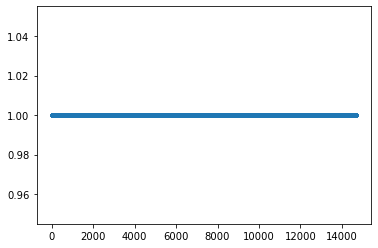

In [26]:
a = densityDF.index.to_numpy()
b = np.diff(a)

plt.plot(b, '.')

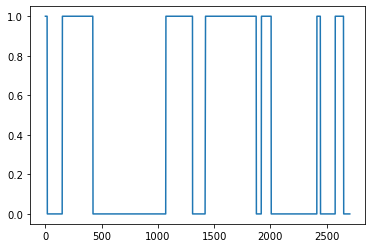

In [30]:
a = hmmdat[14688,:]
plt.plot(a)

In [50]:
# check widom after fix

sampleRef =  pd.read_csv(dataPBase + 'pbrun3-9_SampleReference.csv')
usesamples = [3, 47, 48, 51, 52]



In [2]:
samp = 30
densityFile = dataPBase + '{0}/processed/density/{0}_{1}_density.csv'.format(sampleRef['cell'][samp],
                                                                             sampleRef['sampleName'][samp])
densityDF = pd.read_csv(densityFile, index_col='zmw')

(array([1.560486e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.650000e+02, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 2.000000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

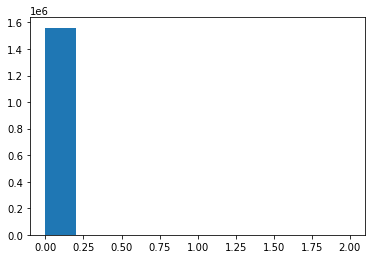

## Looking at HMM input to sanity check results
21/11/01

In [10]:
from glob import glob

#usesamples = [37,38,39,40,41,42,43,44,45,46,47,48]
usesamples = [4,5,8,9,20,21,22,23]

for samp in usesamples:

    parts = sorted(glob(os.path.join(dataPBase,sampleRef['cell'][samp],'processed','forHMM',
                                     sampleRef['cell'][samp] + '_' + 
                                     sampleRef['sampleName'][samp] + '_forHMM_piece*.pickle')))

    methpredD = {}

    for part in tqdm(parts, position=0, desc='{0}_{1}'.format(sampleRef['cell'][samp],sampleRef['sampleName'][samp])):
        with open(part, 'rb') as fin:
            hmminp = pickle.load(fin)

        zmws = list(hmminp.keys())

        for zmw in zmws:
            mpred = np.full(hmminp[zmw]['cclen'], np.nan, dtype='float16')
            ind = hmminp[zmw]['inDat']
            for ix in np.arange(ind.shape[0]):
                mpred[ind['pos'].iloc[ix]] = ind['methPred'].iloc[ix]
            methpredD[zmw] = mpred

    if not os.path.exists(dataPBase + '%s/processed/binarized' % (sampleRef['cell'][samp])):
                os.makedirs(dataPBase + '%s/processed/binarized' % (sampleRef['cell'][samp]))

    with open(dataPBase + '{0}/processed/binarized/{0}_{1}_methylation_predictions.pickle'.format(sampleRef['cell'][samp],
                                                                                                  sampleRef['sampleName'][samp]),
              'wb') as fout:
        pickle.dump(methpredD, fout, protocol=4)



pbrun11_mESCs_SNF2h_SNF2hWTAB_mESCs_plusM_rep2: 100%|██████████| 51/51 [16:47<00:00, 19.75s/it]
210427_NA_SAMv2mESCs_1.0prep_SNF2hKO_mESCs_plusM_rep1: 100%|██████████| 343/343 [1:34:12<00:00, 16.48s/it]
210427_NA_SAMv2mESCs_1.0prep_SNF2hKO_mESCs_plusM_rep2: 100%|██████████| 246/246 [1:06:31<00:00, 16.22s/it]
210427_NA_SAMv2mESCs_1.0prep_SNF2hWTAB_mESCs_plusM_rep1: 100%|██████████| 196/196 [56:39<00:00, 17.35s/it]
210427_NA_SAMv2mESCs_1.0prep_SNF2hWTAB_mESCs_plusM_rep2: 100%|██████████| 278/278 [1:21:21<00:00, 17.56s/it]


## Look at IPD differences between replicates and cells
21/11/02

mESC Snf2h rep3 have signficiantly skewed output compared to rep1 and rep2. Look at IPD values in the full files to see if they explain the differences.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from tqdm import tqdm
import pickle
import os
import socket
from Bio import Seq, SeqIO

%matplotlib inline
matplotlib.rcParams['figure.dpi']= 130

if 'biochem1' in socket.gethostname():
    dataPBase = '/avicenna/vramani/analyses/pacbio/'
    figPBase = '/avicenna/cmcnally/pbanalysis/'
if 'titan' in socket.gethostname():
    dataPBase = '/data/users/goodarzilab/colin/results/pacbio/'
if 'wynton' in socket.gethostname():
    dataPBase = '/wynton/group/goodarzilab/ramanilab/results/pacbio/'
if 'rumi' in socket.gethostname():
    raise Exception('no pacbio results folder on rumi')
    
sampleRef = pd.read_csv(dataPBase + 'sampleRef_K562_mESC.csv', sep=',', index_col=0)
if 'titan' in socket.gethostname():
    sampleRef = pd.concat([sampleRef,
                           pd.read_csv(dataPBase + '210520_NA_K562Brdu_repeat/210520_NA_K562Brdu_repeat.sampleReference.wynton.csv',index_col=0)],
                          ignore_index=True)
    sampleRef = pd.concat([sampleRef,
                           pd.read_csv(dataPBase + '211014_MO_BrdU_invivo/211014_MO_BrdU_invivo.sampleReference.wynton.csv',index_col=0)],
                          ignore_index=True)
pd.set_option('display.max_rows', 100)
sampleRef

,cell,sampleName,unalignedSubreadsFile,ccsFile,alignedSubreadsFile,alignedCcsFile,reference,processed,index
0,pbrun9_SAMv2,k562_SAMv2_minusM_rep1,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/genomes/hg38/hg38.mmi,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN
1,pbrun9_SAMv2,k562_SAMv2_minusM_rep2,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/genomes/hg38/hg38.mmi,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN
2,pbrun9_SAMv2,k562_SAMv2_plusM_rep1,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/genomes/hg38/hg38.mmi,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN
3,pbrun9_SAMv2,k562_SAMv2_plusM_rep2,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/genomes/hg38/hg38.mmi,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN
4,pbrun11_mESCs_SNF2h,SNF2hKO_mESCs_plusM_rep1,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
5,pbrun11_mESCs_SNF2h,SNF2hKO_mESCs_plusM_rep2,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
6,pbrun11_mESCs_SNF2h,SNF2hKO_mESCs_minusM_rep1,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
7,pbrun11_mESCs_SNF2h,SNF2hKO_mESCs_minusM_rep2,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
8,pbrun11_mESCs_SNF2h,SNF2hWTAB_mESCs_plusM_rep1,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
9,pbrun11_mESCs_SNF2h,SNF2hWTAB_mESCs_plusM_rep2,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN


In [2]:
os.get_terminal_size()

os.terminal_size(columns=133, lines=69)

In [3]:
#usesamples = [22,23,38,42, 24,25,37,41, 20,21,40,44, 26,27,39,43,4,5,8,9,14,15,18,19,63]

#looking at unmethylated sample differences
usesamples = [6,7,10,11,12,13,16,17,49,50,64]

meanpercD = {}
nzmw = {}

for samp in usesamples:
    
    meanpercD[samp] = {}
    
    with open(os.path.join(dataPBase, sampleRef['cell'][samp],'processed','full',
                           sampleRef['cell'][samp] + '_' + sampleRef['sampleName'][samp] + '_full.pickle'), 'rb') as fin:
        ipdfull = pickle.load(fin, encoding="latin1")

    zmwlist = list(ipdfull.keys())
    nzmw[samp] = len(zmwlist)
    
    bases = ['A', 'C', 'G', 'T']
    ixs = np.arange(0,101)
    
    for b in tqdm(bases, position=0, desc='{0:02}'.format(samp), ncols=100):
        pcf = np.full((len(zmwlist), 101), np.nan, dtype='float32')

        for iz, zmw in enumerate(zmwlist):
            pcf[iz, :] = ipdfull[zmw]['percentiles'][b][ixs]
        
        meanpercD[samp][b] = np.mean(pcf, axis=0)

64: 100%|█████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.07it/s]


In [3]:
# add more samples without losing previous

usesamples = [45]

for samp in usesamples:
    
    meanpercD[samp] = {}
    
    with open(os.path.join(dataPBase, sampleRef['cell'][samp],'processed','full',
                           sampleRef['cell'][samp] + '_' + sampleRef['sampleName'][samp] + '_full.pickle'), 'rb') as fin:
        ipdfull = pickle.load(fin, encoding="latin1")

    zmwlist = list(ipdfull.keys())
    nzmw[samp] = len(zmwlist)
    
    bases = ['A', 'C', 'G', 'T']
    ixs = np.arange(0,101)
    
    for b in tqdm(bases, position=0, desc='{0:02}'.format(samp)):
        pcf = np.full((len(zmwlist), 101), np.nan, dtype='float32')

        for iz, zmw in enumerate(zmwlist):
            pcf[iz, :] = ipdfull[zmw]['percentiles'][b][ixs]
        
        meanpercD[samp][b] = np.mean(pcf, axis=0)

45: 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]


In [ ]:
ipdfull = [4,5,6,7,8,10]

Text(0.5, 0.98, 'ATPaseM rep1 & 2 vs. technical replicates')

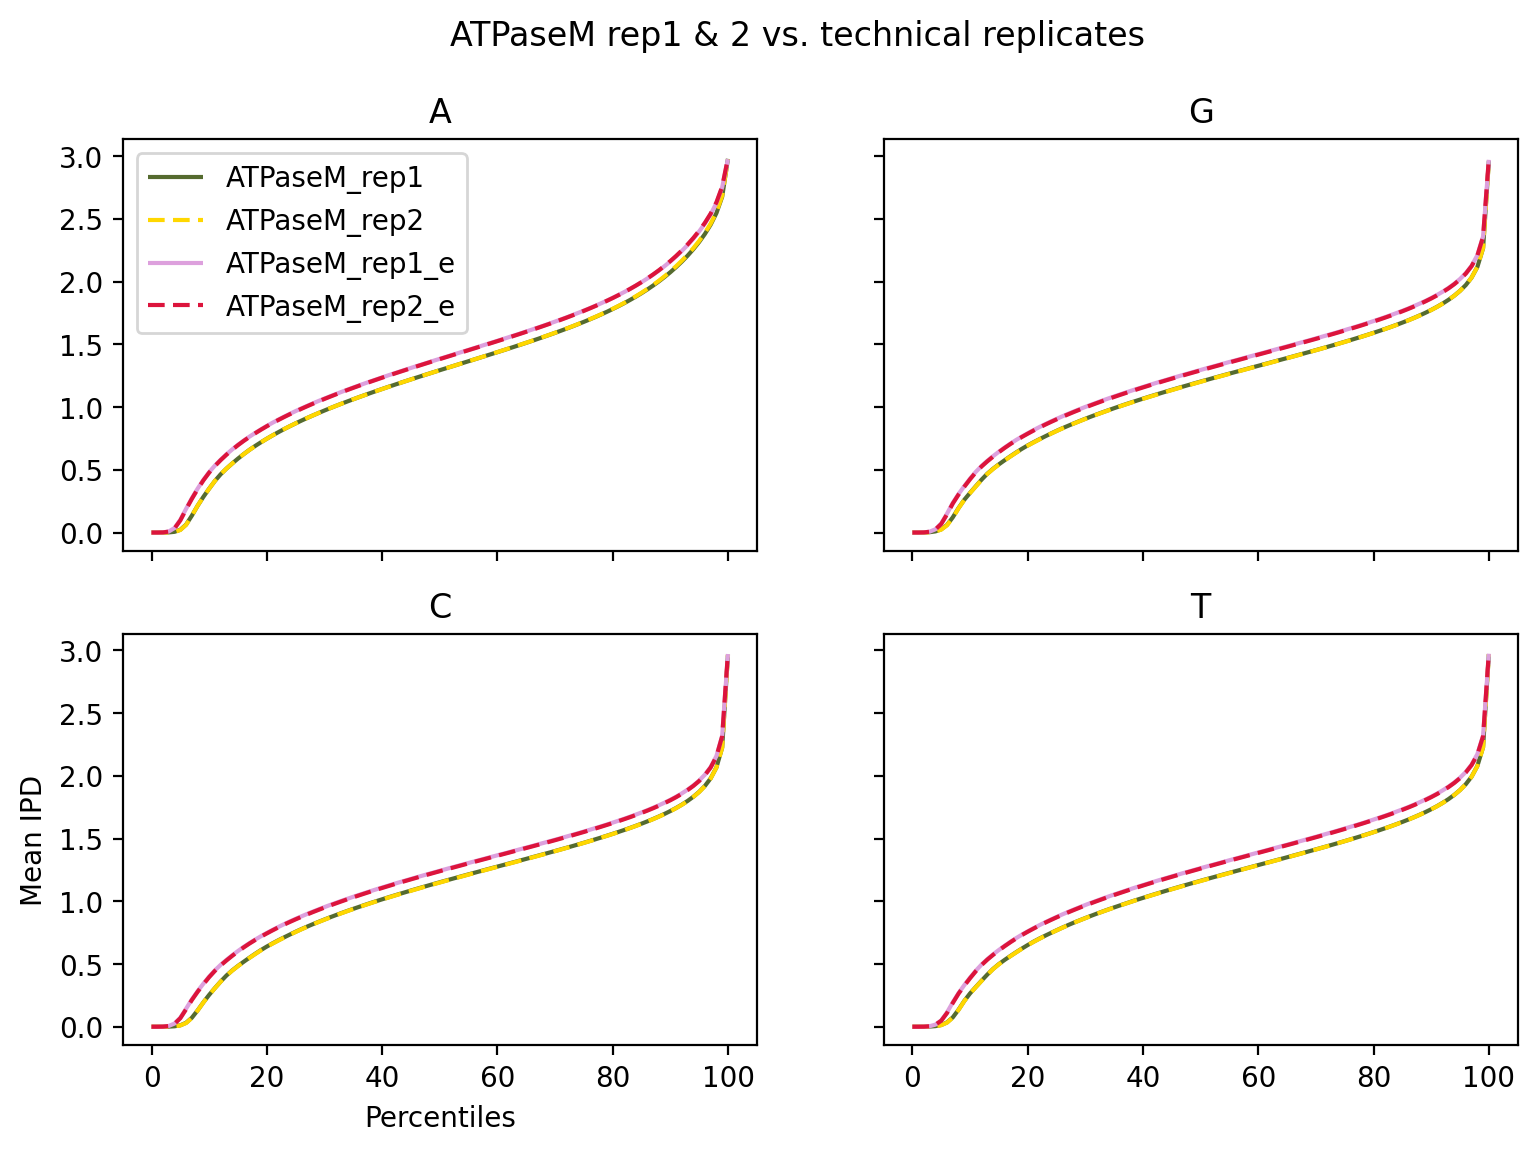

In [45]:
%matplotlib inline
matplotlib.rcParams['figure.dpi']= 200

fig, ax = plt.subplots(2,2, figsize=(9,6), sharex=True, sharey=True)
coldic = {26:'darkolivegreen', 27:'gold', 18:'plum', 19:'crimson'}
dashdic = {26:(4,0), 27:(4,2), 18:(4,0), 19:(4,2)}
sampns = {26:'ATPaseM_rep1', 27:'ATPaseM_rep2', 18:'ATPaseM_rep1_e', 19:'ATPaseM_rep2_e'}
for samp in [26,27,18,19]:
    for ib, b in enumerate(bases): #enumerate(bases):
        lab = None
        if b == 'A':
            lab = sampns[samp]
        ax[ib%2, int(np.floor(ib/2))].plot(ixs, meanpercD[samp][b], color=coldic[samp], label=lab, dashes=dashdic[samp])
        ax[ib%2, int(np.floor(ib/2))].set_title(b)

ax[0,0].legend()
ax[1,0].set_xlabel('Percentiles')
ax[1,0].set_ylabel('Mean IPD')
fig.suptitle('ATPaseM rep1 & 2 vs. technical replicates')

Text(0.5, 0.98, 'ATPaseM rep1 & 2 vs. rep3')

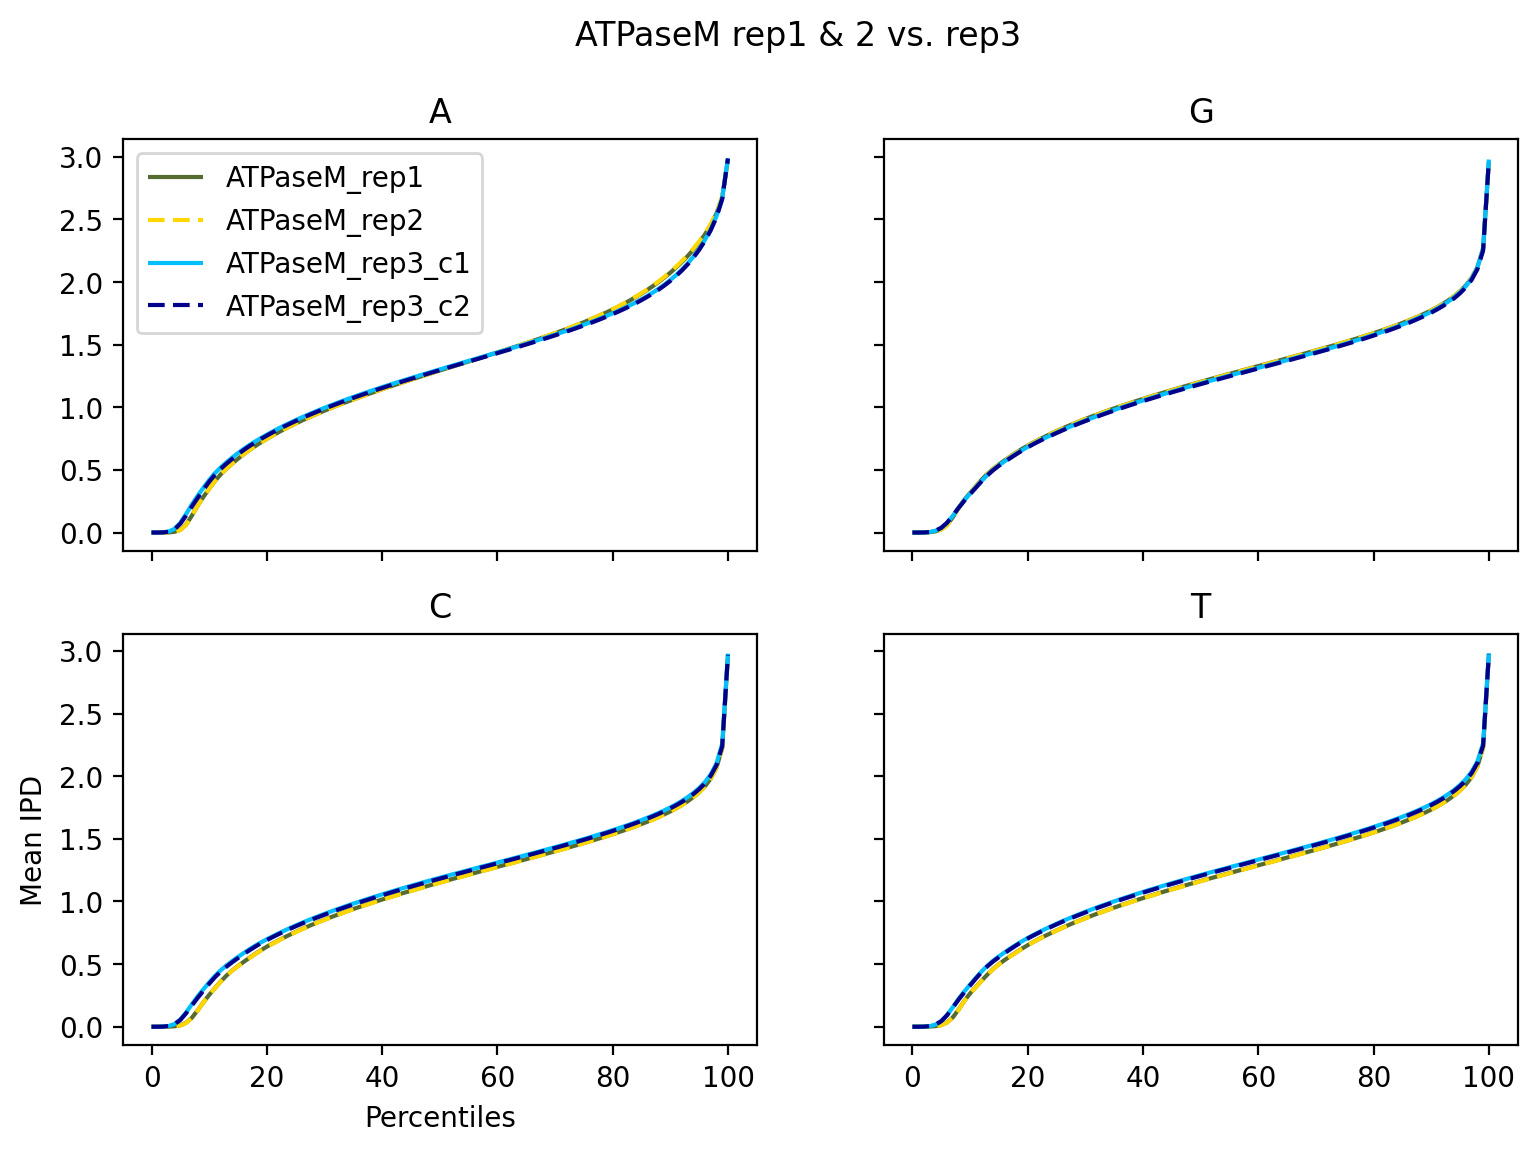

In [44]:
fig, ax = plt.subplots(2,2, figsize=(9,6), sharex=True, sharey=True)
coldic = {26:'darkolivegreen', 27:'gold', 39:'deepskyblue', 43:'darkblue'}
dashdic = {26:(4,0), 27:(4,2), 39:(4,0), 43:(4,2)}
sampns = {26:'ATPaseM_rep1', 27:'ATPaseM_rep2', 39:'ATPaseM_rep3_c1', 43:'ATPaseM_rep3_c2'}
for samp in [26,27,39,43]:
    for ib, b in enumerate(bases): #enumerate(bases):
        lab = None
        if b == 'A':
            lab = sampns[samp]
        ax[ib%2, int(np.floor(ib/2))].plot(ixs, meanpercD[samp][b], color=coldic[samp], label=lab, dashes=dashdic[samp])
        ax[ib%2, int(np.floor(ib/2))].set_title(b)

ax[0,0].legend()
ax[1,0].set_xlabel('Percentiles')
ax[1,0].set_ylabel('Mean IPD')
fig.suptitle('ATPaseM rep1 & 2 vs. rep3')

Text(0.5, 0.98, 'SNF2hKO rep1 & 2 vs. technical replicates')

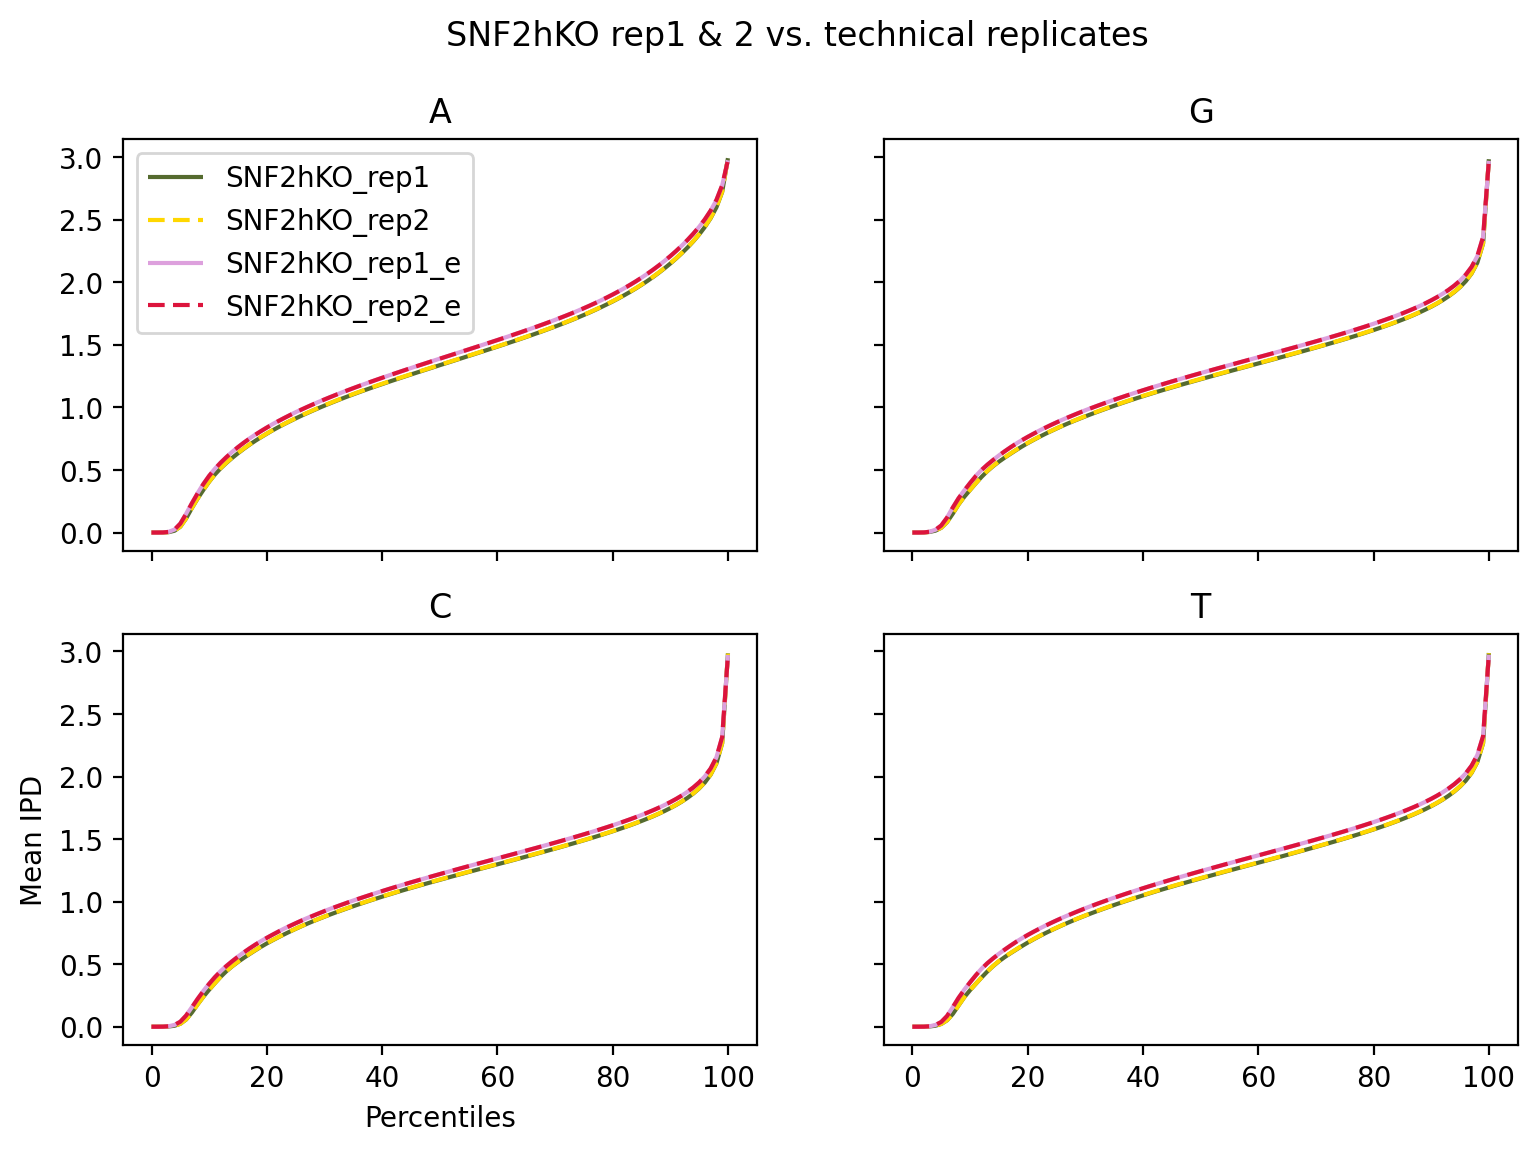

In [43]:
fig, ax = plt.subplots(2,2, figsize=(9,6), sharex=True, sharey=True)
coldic = {20:'darkolivegreen', 21:'gold', 4:'plum', 5:'crimson'}
dashdic = {20:(4,0), 21:(4,2), 4:(4,0), 5:(4,2)}
sampns = {20:'SNF2hKO_rep1', 21:'SNF2hKO_rep2', 4:'SNF2hKO_rep1_e', 5:'SNF2hKO_rep2_e'}
for samp in [20,21,4,5]:
    for ib, b in enumerate(bases): #enumerate(bases):
        lab = None
        if b == 'A':
            lab = sampns[samp]
        ax[ib%2, int(np.floor(ib/2))].plot(ixs, meanpercD[samp][b], color=coldic[samp], label=lab, dashes=dashdic[samp])
        ax[ib%2, int(np.floor(ib/2))].set_title(b)

ax[0,0].legend()
ax[1,0].set_xlabel('Percentiles')
ax[1,0].set_ylabel('Mean IPD')
fig.suptitle('SNF2hKO rep1 & 2 vs. technical replicates')

Text(0.5, 0.98, 'SNF2hKO rep1 & 2 vs. rep3')

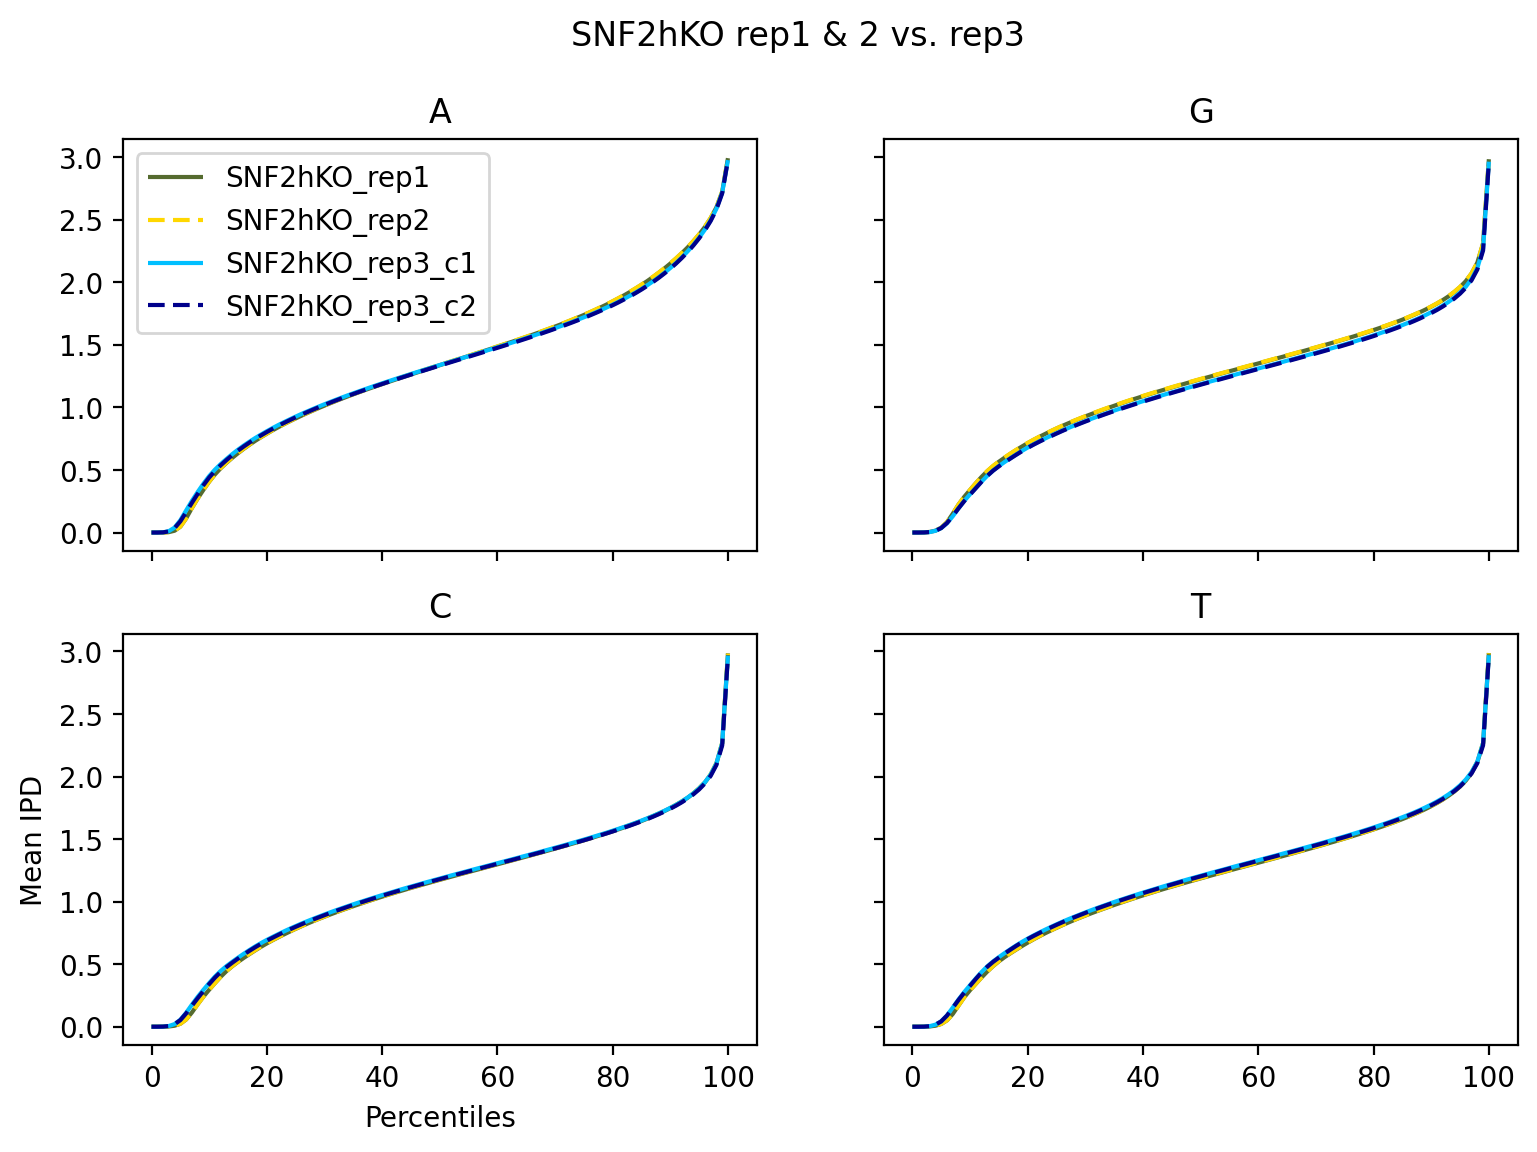

In [40]:
fig, ax = plt.subplots(2,2, figsize=(9,6), sharex=True, sharey=True)
coldic = {20:'darkolivegreen', 21:'gold', 40:'deepskyblue', 44:'darkblue'}
dashdic = {20:(4,0), 21:(4,2), 40:(4,0), 44:(4,2)}
sampns = {20:'SNF2hKO_rep1', 21:'SNF2hKO_rep2', 40:'SNF2hKO_rep3_c1', 44:'SNF2hKO_rep3_c2'}
for samp in [20,21,40,44]:
    for ib, b in enumerate(bases): #enumerate(bases):
        lab = None
        if b == 'A':
            lab = sampns[samp]
        ax[ib%2, int(np.floor(ib/2))].plot(ixs, meanpercD[samp][b], color=coldic[samp], label=lab, dashes=dashdic[samp])
        ax[ib%2, int(np.floor(ib/2))].set_title(b)

ax[0,0].legend()
ax[1,0].set_xlabel('Percentiles')
ax[1,0].set_ylabel('Mean IPD')
fig.suptitle('SNF2hKO rep1 & 2 vs. rep3')

Text(0.5, 0.98, 'E14 rep1 & 2 vs. technical replicates')

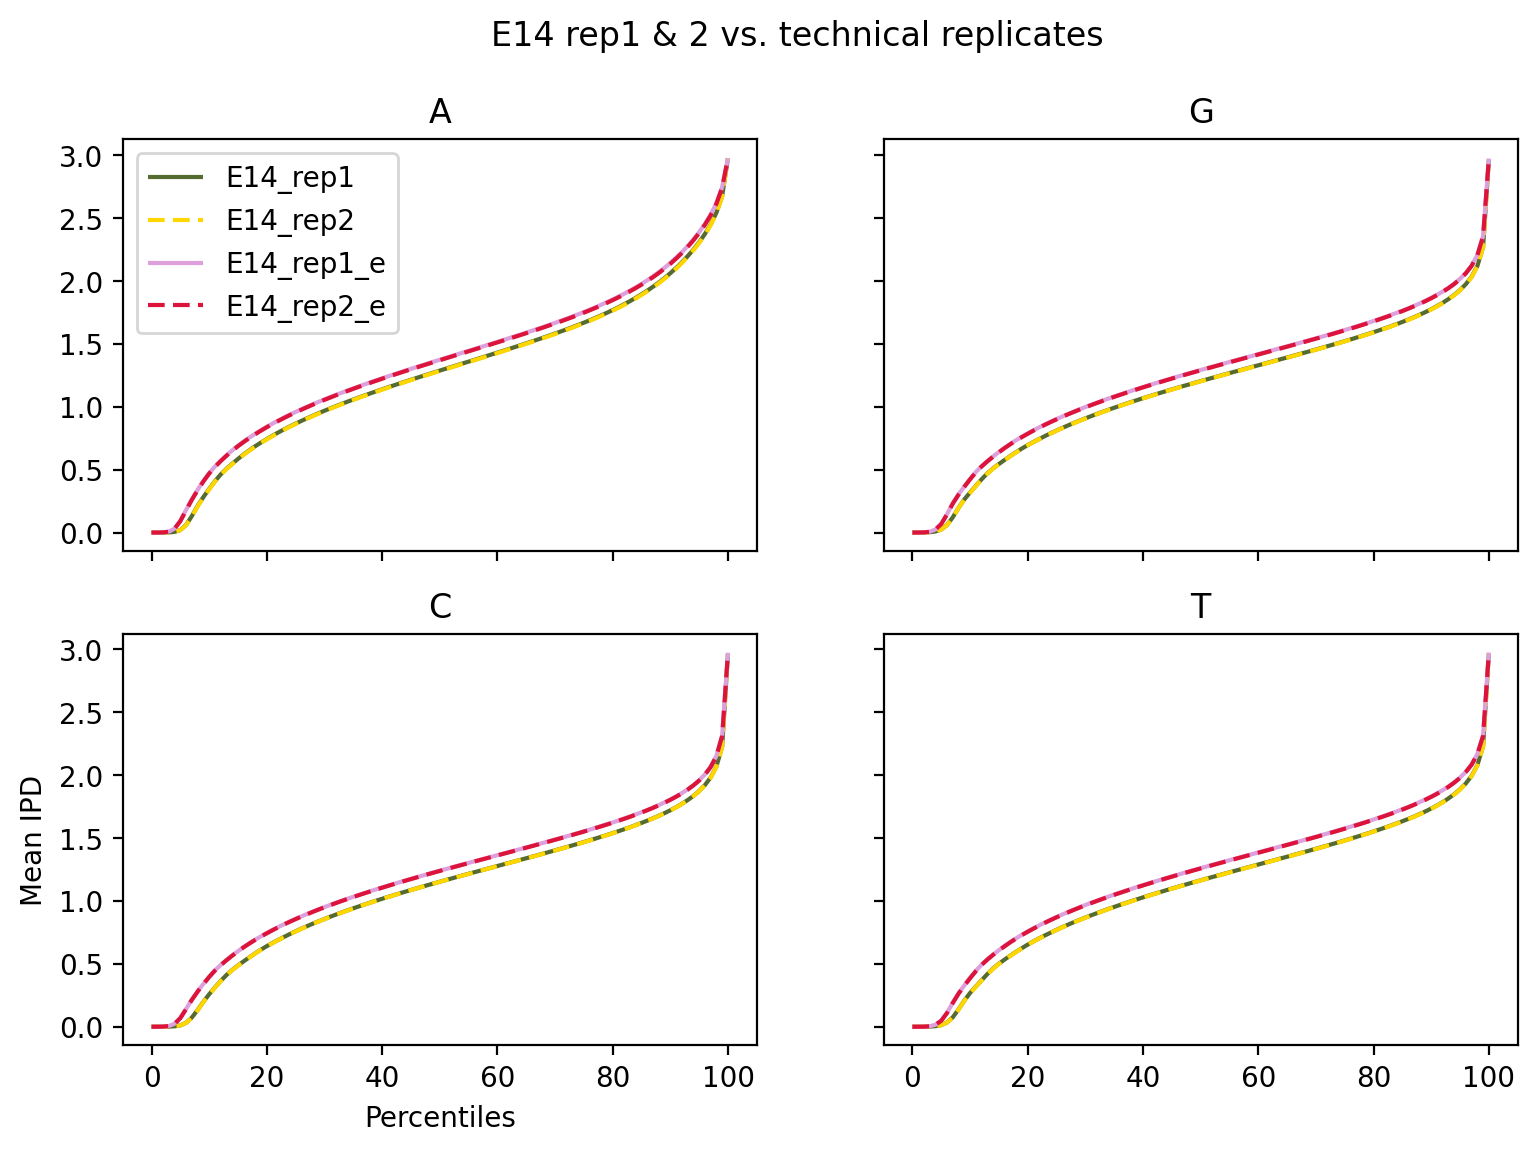

In [39]:
fig, ax = plt.subplots(2,2, figsize=(9,6), sharex=True, sharey=True)
coldic = {24:'darkolivegreen', 25:'gold', 14:'plum', 15:'crimson'}
dashdic = {24:(4,0), 25:(4,2), 14:(4,0), 15:(4,2)}
sampns = {24:'E14_rep1', 25:'E14_rep2', 14:'E14_rep1_e', 15:'E14_rep2_e'}
for samp in [24,25,14,15]:
    for ib, b in enumerate(bases): #enumerate(bases):
        lab = None
        if b == 'A':
            lab = sampns[samp]
        ax[ib%2, int(np.floor(ib/2))].plot(ixs, meanpercD[samp][b], color=coldic[samp], label=lab, dashes=dashdic[samp])
        ax[ib%2, int(np.floor(ib/2))].set_title(b)

ax[0,0].legend()
ax[1,0].set_xlabel('Percentiles')
ax[1,0].set_ylabel('Mean IPD')
fig.suptitle('E14 rep1 & 2 vs. technical replicates')

Text(0.5, 0.98, 'E14 rep1 & 2 vs. rep3')

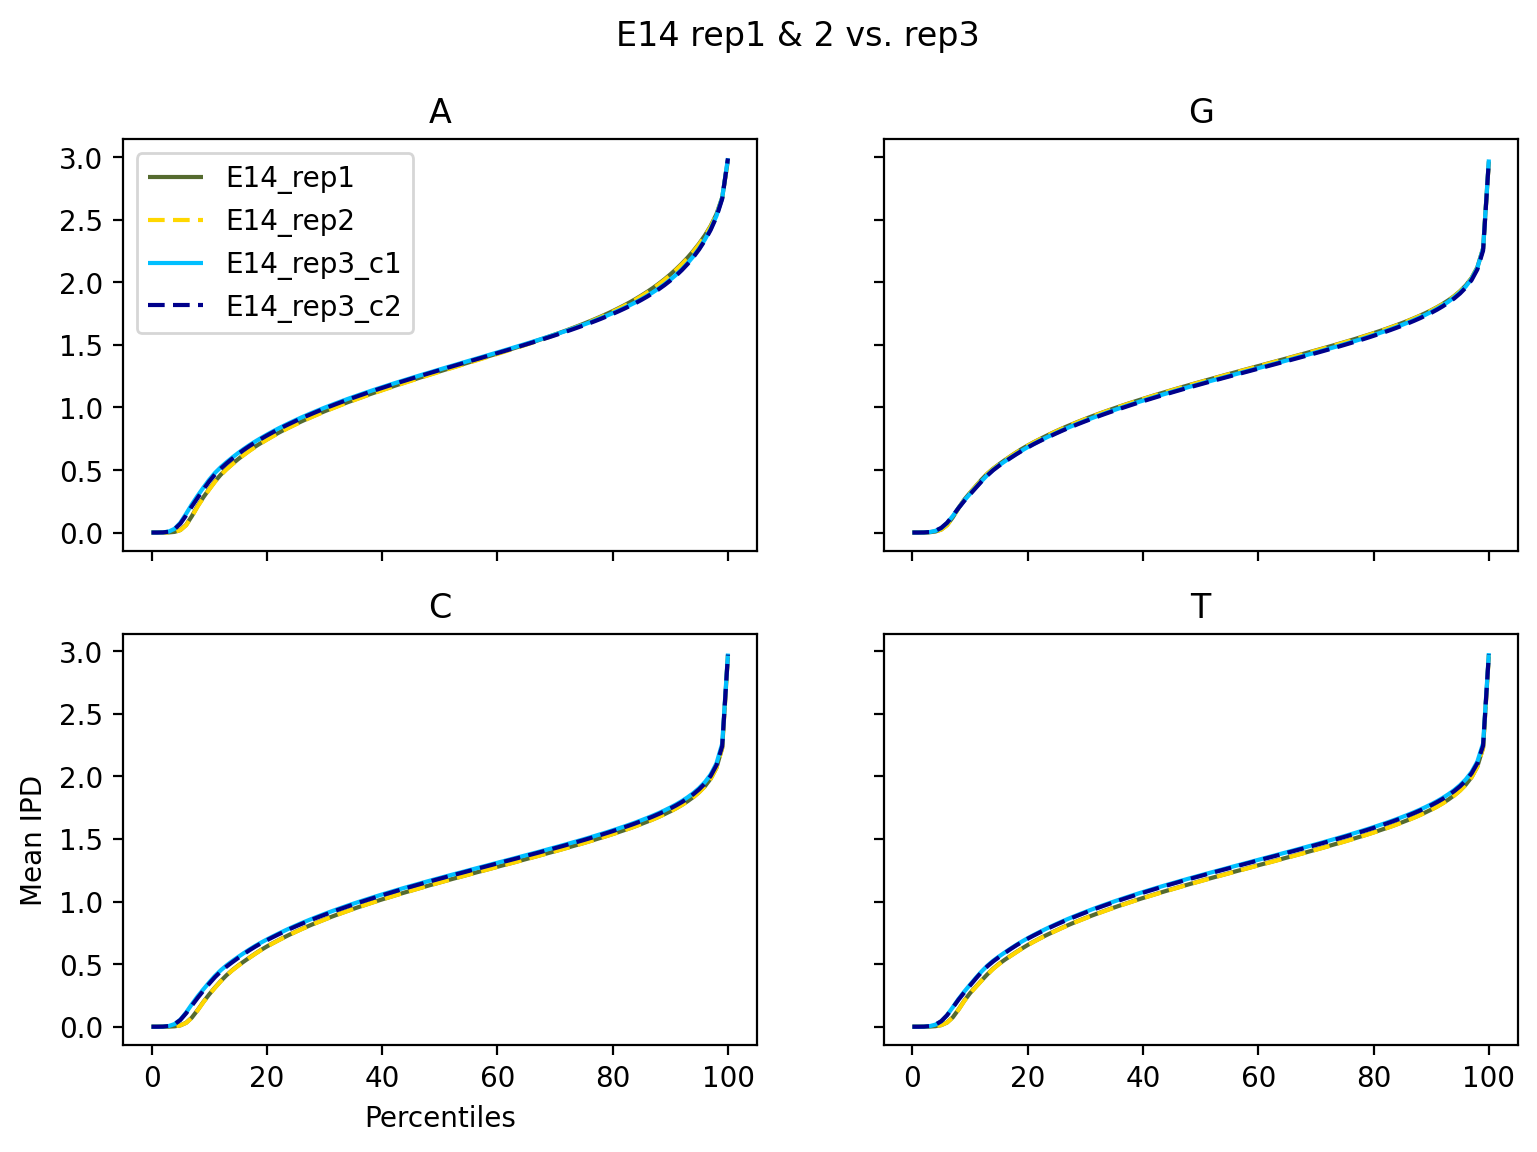

In [37]:
fig, ax = plt.subplots(2,2, figsize=(9,6), sharex=True, sharey=True)
coldic = {24:'darkolivegreen', 25:'gold', 37:'deepskyblue', 41:'darkblue'}
dashdic = {24:(4,0), 25:(4,2), 37:(4,0), 41:(4,2)}
sampns = {24:'E14_rep1', 25:'E14_rep2', 37:'E14_rep3_c1', 41:'E14_rep3_c2'}
for samp in [24,25,37,41]:
    for ib, b in enumerate(bases): #enumerate(bases):
        lab = None
        if b == 'A':
            lab = sampns[samp]
        ax[ib%2, int(np.floor(ib/2))].plot(ixs, meanpercD[samp][b], color=coldic[samp], label=lab, dashes=dashdic[samp])
        ax[ib%2, int(np.floor(ib/2))].set_title(b)

ax[0,0].legend()
ax[1,0].set_xlabel('Percentiles')
ax[1,0].set_ylabel('Mean IPD')
fig.suptitle('E14 rep1 & 2 vs. rep3')

Text(0.5, 0.98, 'WTAB rep1 & 2 vs. technical replicates')

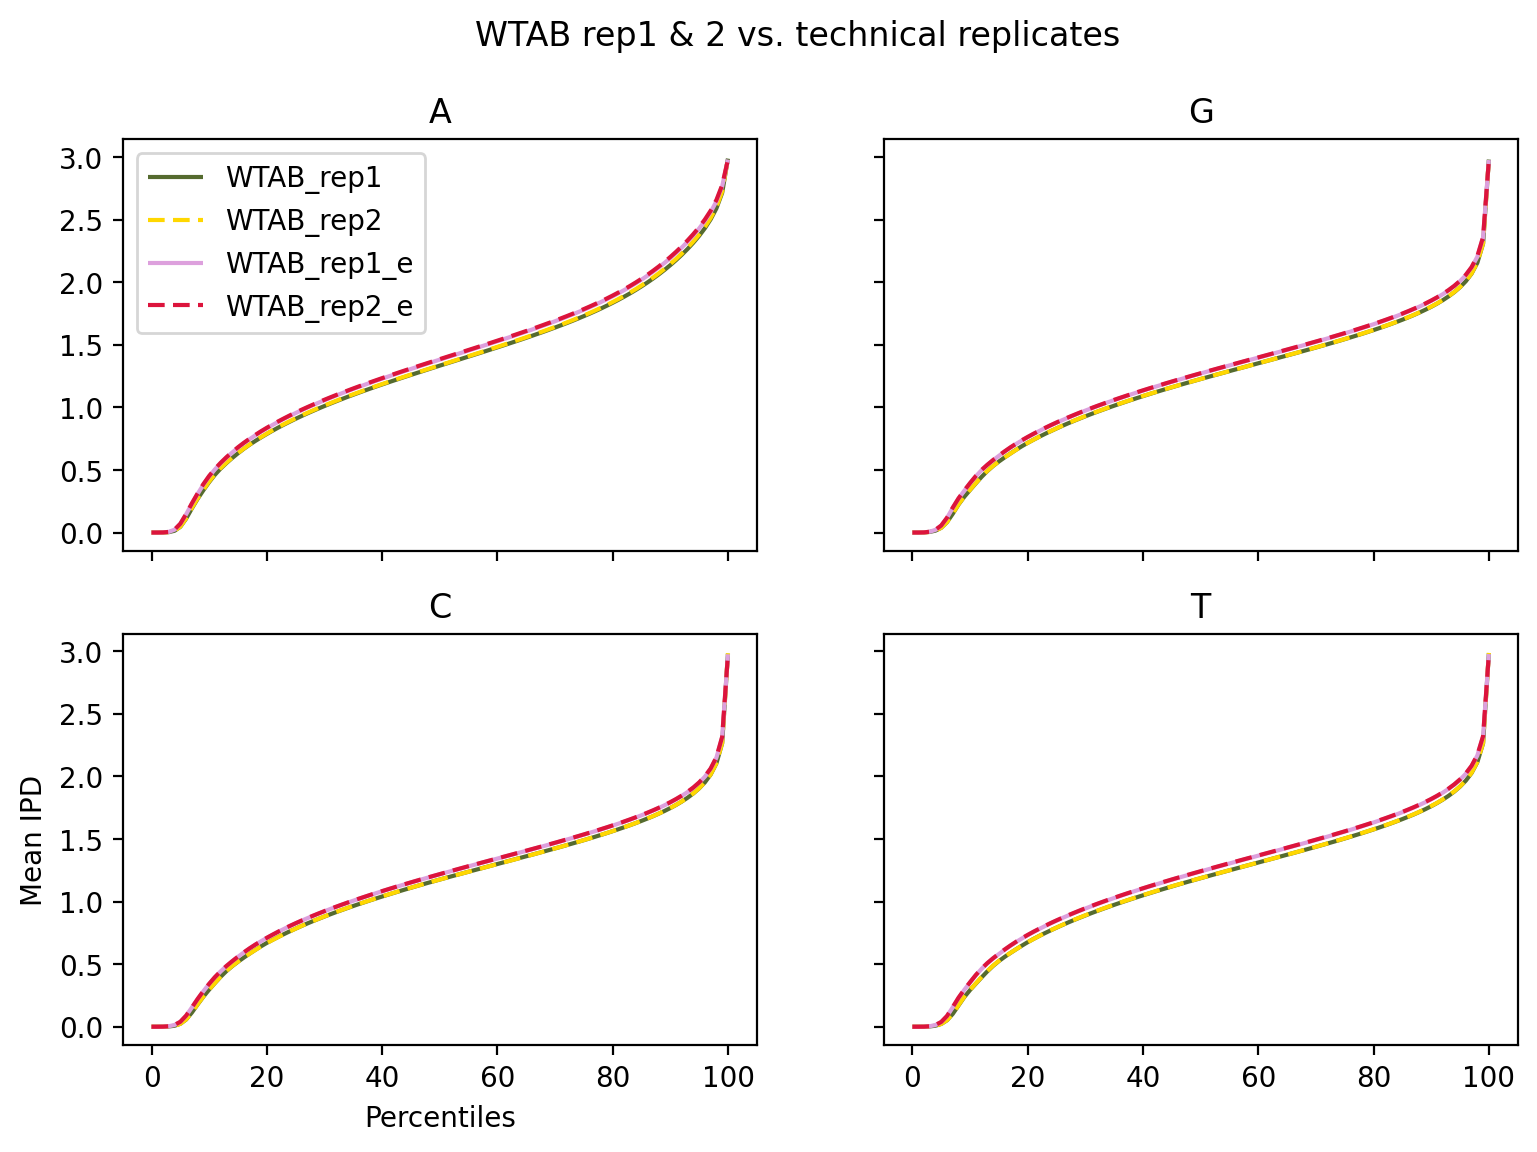

In [36]:
fig, ax = plt.subplots(2,2, figsize=(9,6), sharex=True, sharey=True)
coldic = {22:'darkolivegreen', 23:'gold', 8:'plum', 9:'crimson'}
dashdic = {22:(4,0), 23:(4,2), 8:(4,0), 9:(4,2)}
sampns = {22:'WTAB_rep1', 23:'WTAB_rep2', 8:'WTAB_rep1_e', 9:'WTAB_rep2_e'}
for samp in [22,23,8,9]:
    for ib, b in enumerate(bases): #enumerate(bases):
        lab = None
        if b == 'A':
            lab = sampns[samp]
        ax[ib%2, int(np.floor(ib/2))].plot(ixs, meanpercD[samp][b], color=coldic[samp], label=lab, dashes=dashdic[samp])
        ax[ib%2, int(np.floor(ib/2))].set_title(b)

ax[0,0].legend()
ax[1,0].set_xlabel('Percentiles')
ax[1,0].set_ylabel('Mean IPD')
fig.suptitle('WTAB rep1 & 2 vs. technical replicates')

Text(0.5, 0.98, 'WTAB rep1 & 2 vs. rep3')

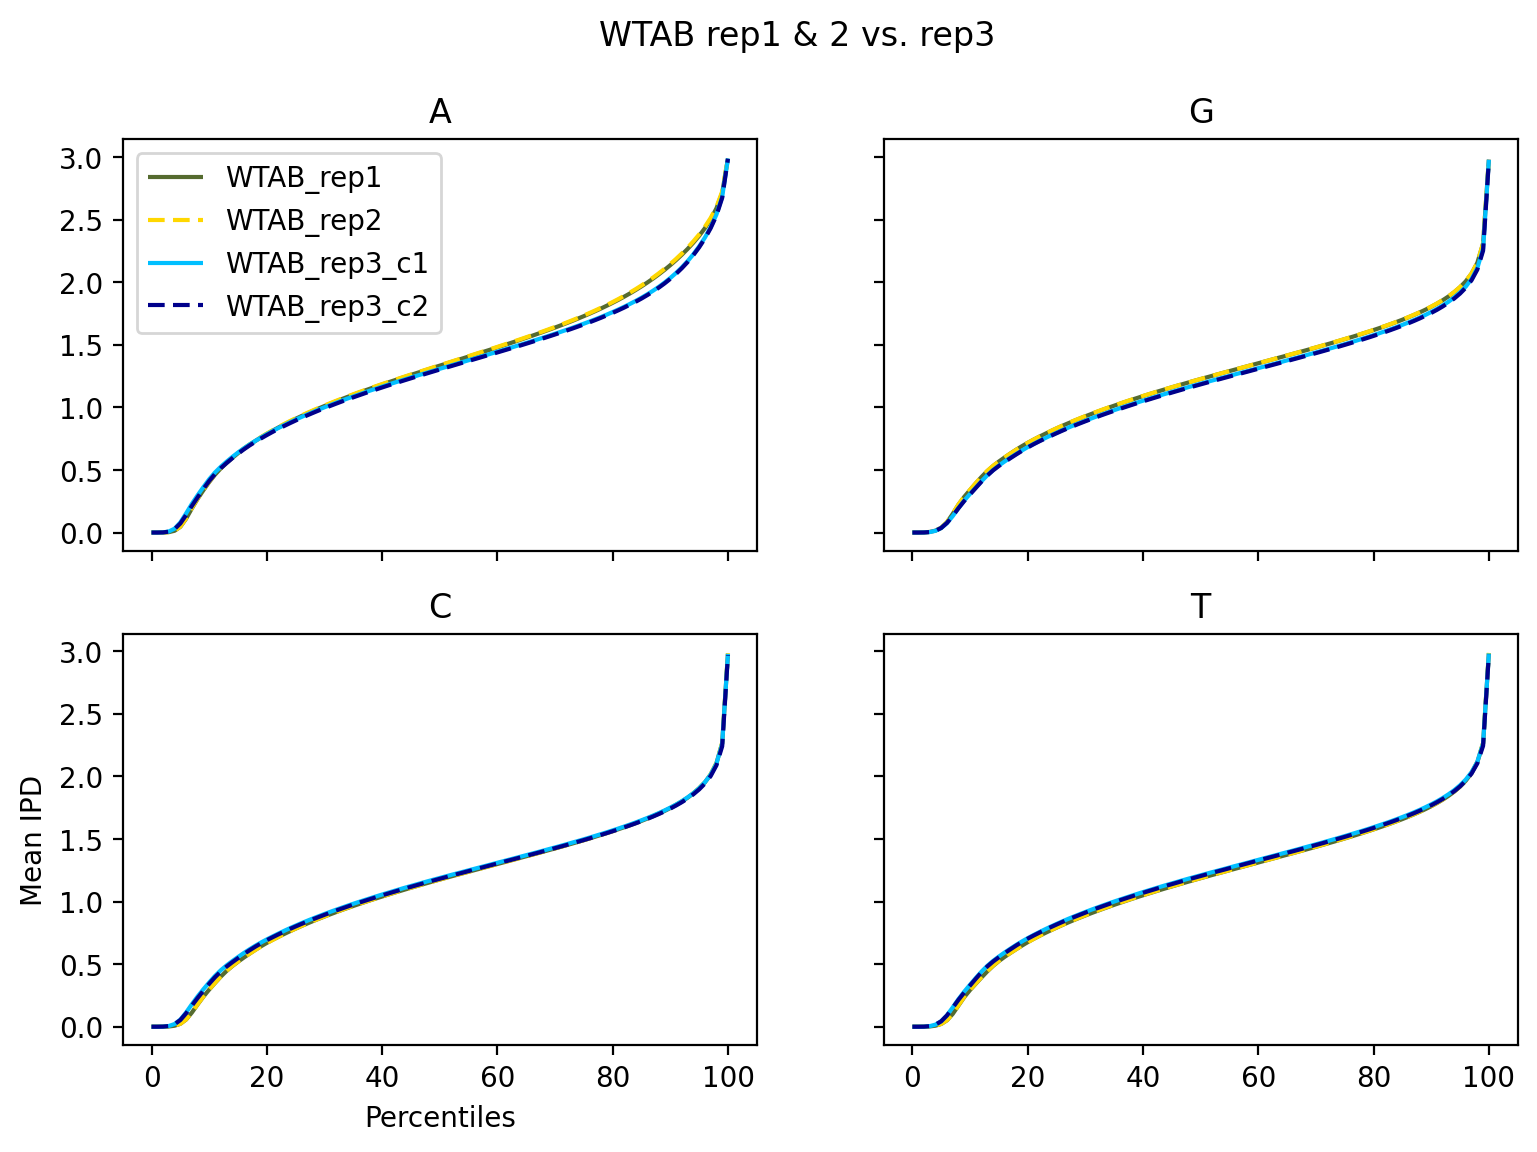

In [35]:
fig, ax = plt.subplots(2,2, figsize=(9,6), sharex=True, sharey=True)
coldic = {22:'darkolivegreen', 23:'gold', 38:'deepskyblue', 42:'darkblue'}
dashdic = {22:(4,0), 23:(4,2), 38:(4,0), 42:(4,2)}
sampns = {22:'WTAB_rep1', 23:'WTAB_rep2', 38:'WTAB_rep3_c1', 42:'WTAB_rep3_c2'}
for samp in [22,23,38,42]:
    for ib, b in enumerate(bases): #enumerate(bases):
        lab = None
        if b == 'A':
            lab = sampns[samp]
        ax[ib%2, int(np.floor(ib/2))].plot(ixs, meanpercD[samp][b], color=coldic[samp], label=lab, dashes=dashdic[samp])
        ax[ib%2, int(np.floor(ib/2))].set_title(b)

ax[0,0].legend()
ax[1,0].set_xlabel('Percentiles')
ax[1,0].set_ylabel('Mean IPD')
fig.suptitle('WTAB rep1 & 2 vs. rep3')

In [4]:
# compare E14 including the brdU control, to look at variation over time and across cells

usesamples = [14,15,24,25,37,41,45,51,52]

meanpercD = {}
nzmw = {}

for samp in usesamples:
    
    meanpercD[samp] = {}
    
    with open(os.path.join(dataPBase, sampleRef['cell'][samp],'processed','full',
                           sampleRef['cell'][samp] + '_' + sampleRef['sampleName'][samp] + '_full.pickle'), 'rb') as fin:
        ipdfull = pickle.load(fin, encoding="latin1")

    zmwlist = list(ipdfull.keys())
    nzmw[samp] = len(zmwlist)
    
    bases = ['A', 'C', 'G', 'T']
    ixs = np.arange(0,101)
    
    for b in tqdm(bases, position=0, desc='{0:02}'.format(samp)):
        pcf = np.full((len(zmwlist), 101), np.nan, dtype='float32')

        for iz, zmw in enumerate(zmwlist):
            pcf[iz, :] = ipdfull[zmw]['percentiles'][b][ixs]
        
        meanpercD[samp][b] = np.mean(pcf, axis=0)

52: 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


In [ ]:
fig, ax = plt.subplots(2,2, figsize=(9,6), sharex=True, sharey=True)
coldic = {22:'darkolivegreen', 23:'gold', 38:'deepskyblue', 42:'darkblue'}
dashdic = {22:(4,0), 23:(4,2), 38:(4,0), 42:(4,2)}
sampns = {22:'WTAB_rep1', 23:'WTAB_rep2', 38:'WTAB_rep3_c1', 42:'WTAB_rep3_c2'}
for samp in [22,23,38,42]:
    for ib, b in enumerate(bases): #enumerate(bases):
        lab = None
        if b == 'A':
            lab = sampns[samp]
        ax[ib%2, int(np.floor(ib/2))].plot(ixs, meanpercD[samp][b], color=coldic[samp], label=lab, dashes=dashdic[samp])
        ax[ib%2, int(np.floor(ib/2))].set_title(b)

ax[0,0].legend()
ax[1,0].set_xlabel('Percentiles')
ax[1,0].set_ylabel('Mean IPD')
fig.suptitle('WTAB rep1 & 2 vs. rep3')

Text(0, 0.5, 'Mean IPD')

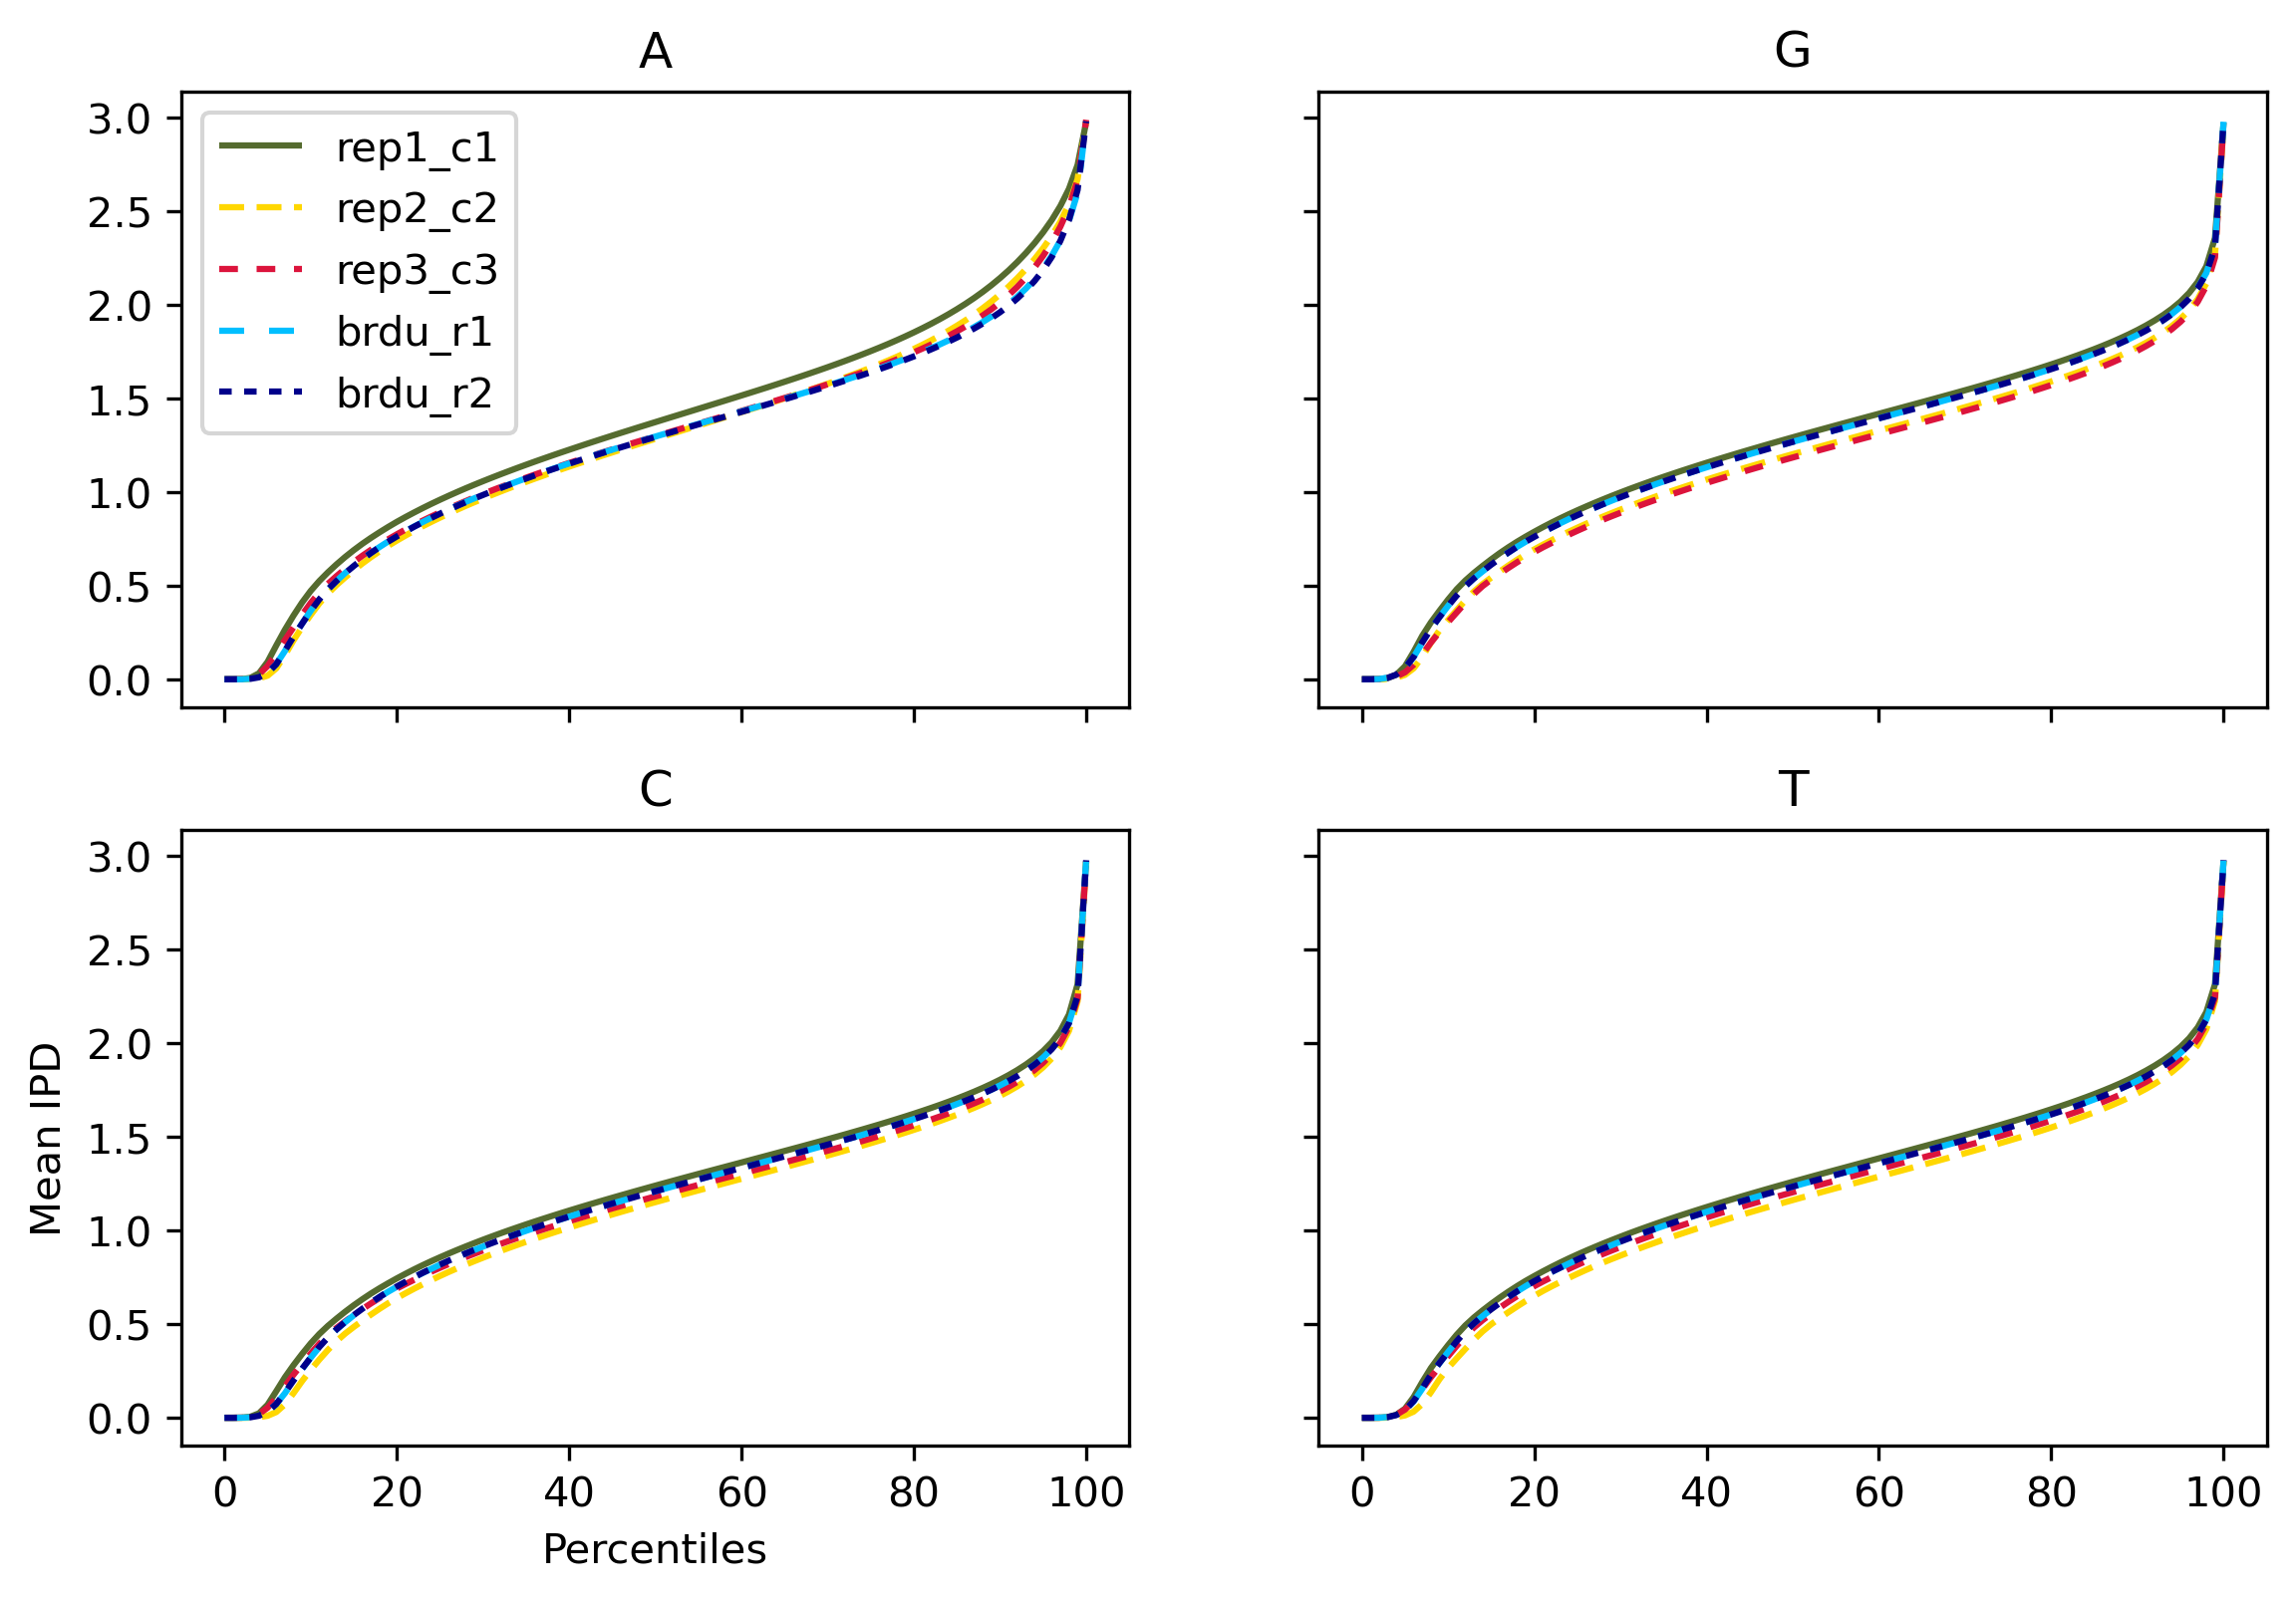

In [14]:
fig, ax = plt.subplots(2,2, figsize=(9,6), sharex=True, sharey=True)
coldic = {14:'darkolivegreen', 25:'gold', 41:'crimson', 51:'deepskyblue', 52:'darkblue'}
dashdic = {14:(4,0), 25:(4,2), 41:(3,3), 51:(4,4), 52:(2,2)}
sampns = {14:'rep1_c1', 25:'rep2_c2', 41:'rep3_c3', 51:'brdu_r1', 52:'brdu_r2'}
for samp in [14,25,41,51,52]:
    for ib, b in enumerate(bases): #enumerate(bases):
        lab = None
        if b == 'A':
            lab = sampns[samp]
        ax[ib%2, int(np.floor(ib/2))].plot(ixs, meanpercD[samp][b], color=coldic[samp], label=lab, dashes=dashdic[samp])
        ax[ib%2, int(np.floor(ib/2))].set_title(b)

ax[0,0].legend()
ax[1,0].set_xlabel('Percentiles')
ax[1,0].set_ylabel('Mean IPD')

Text(0, 0.5, 'Mean IPD')

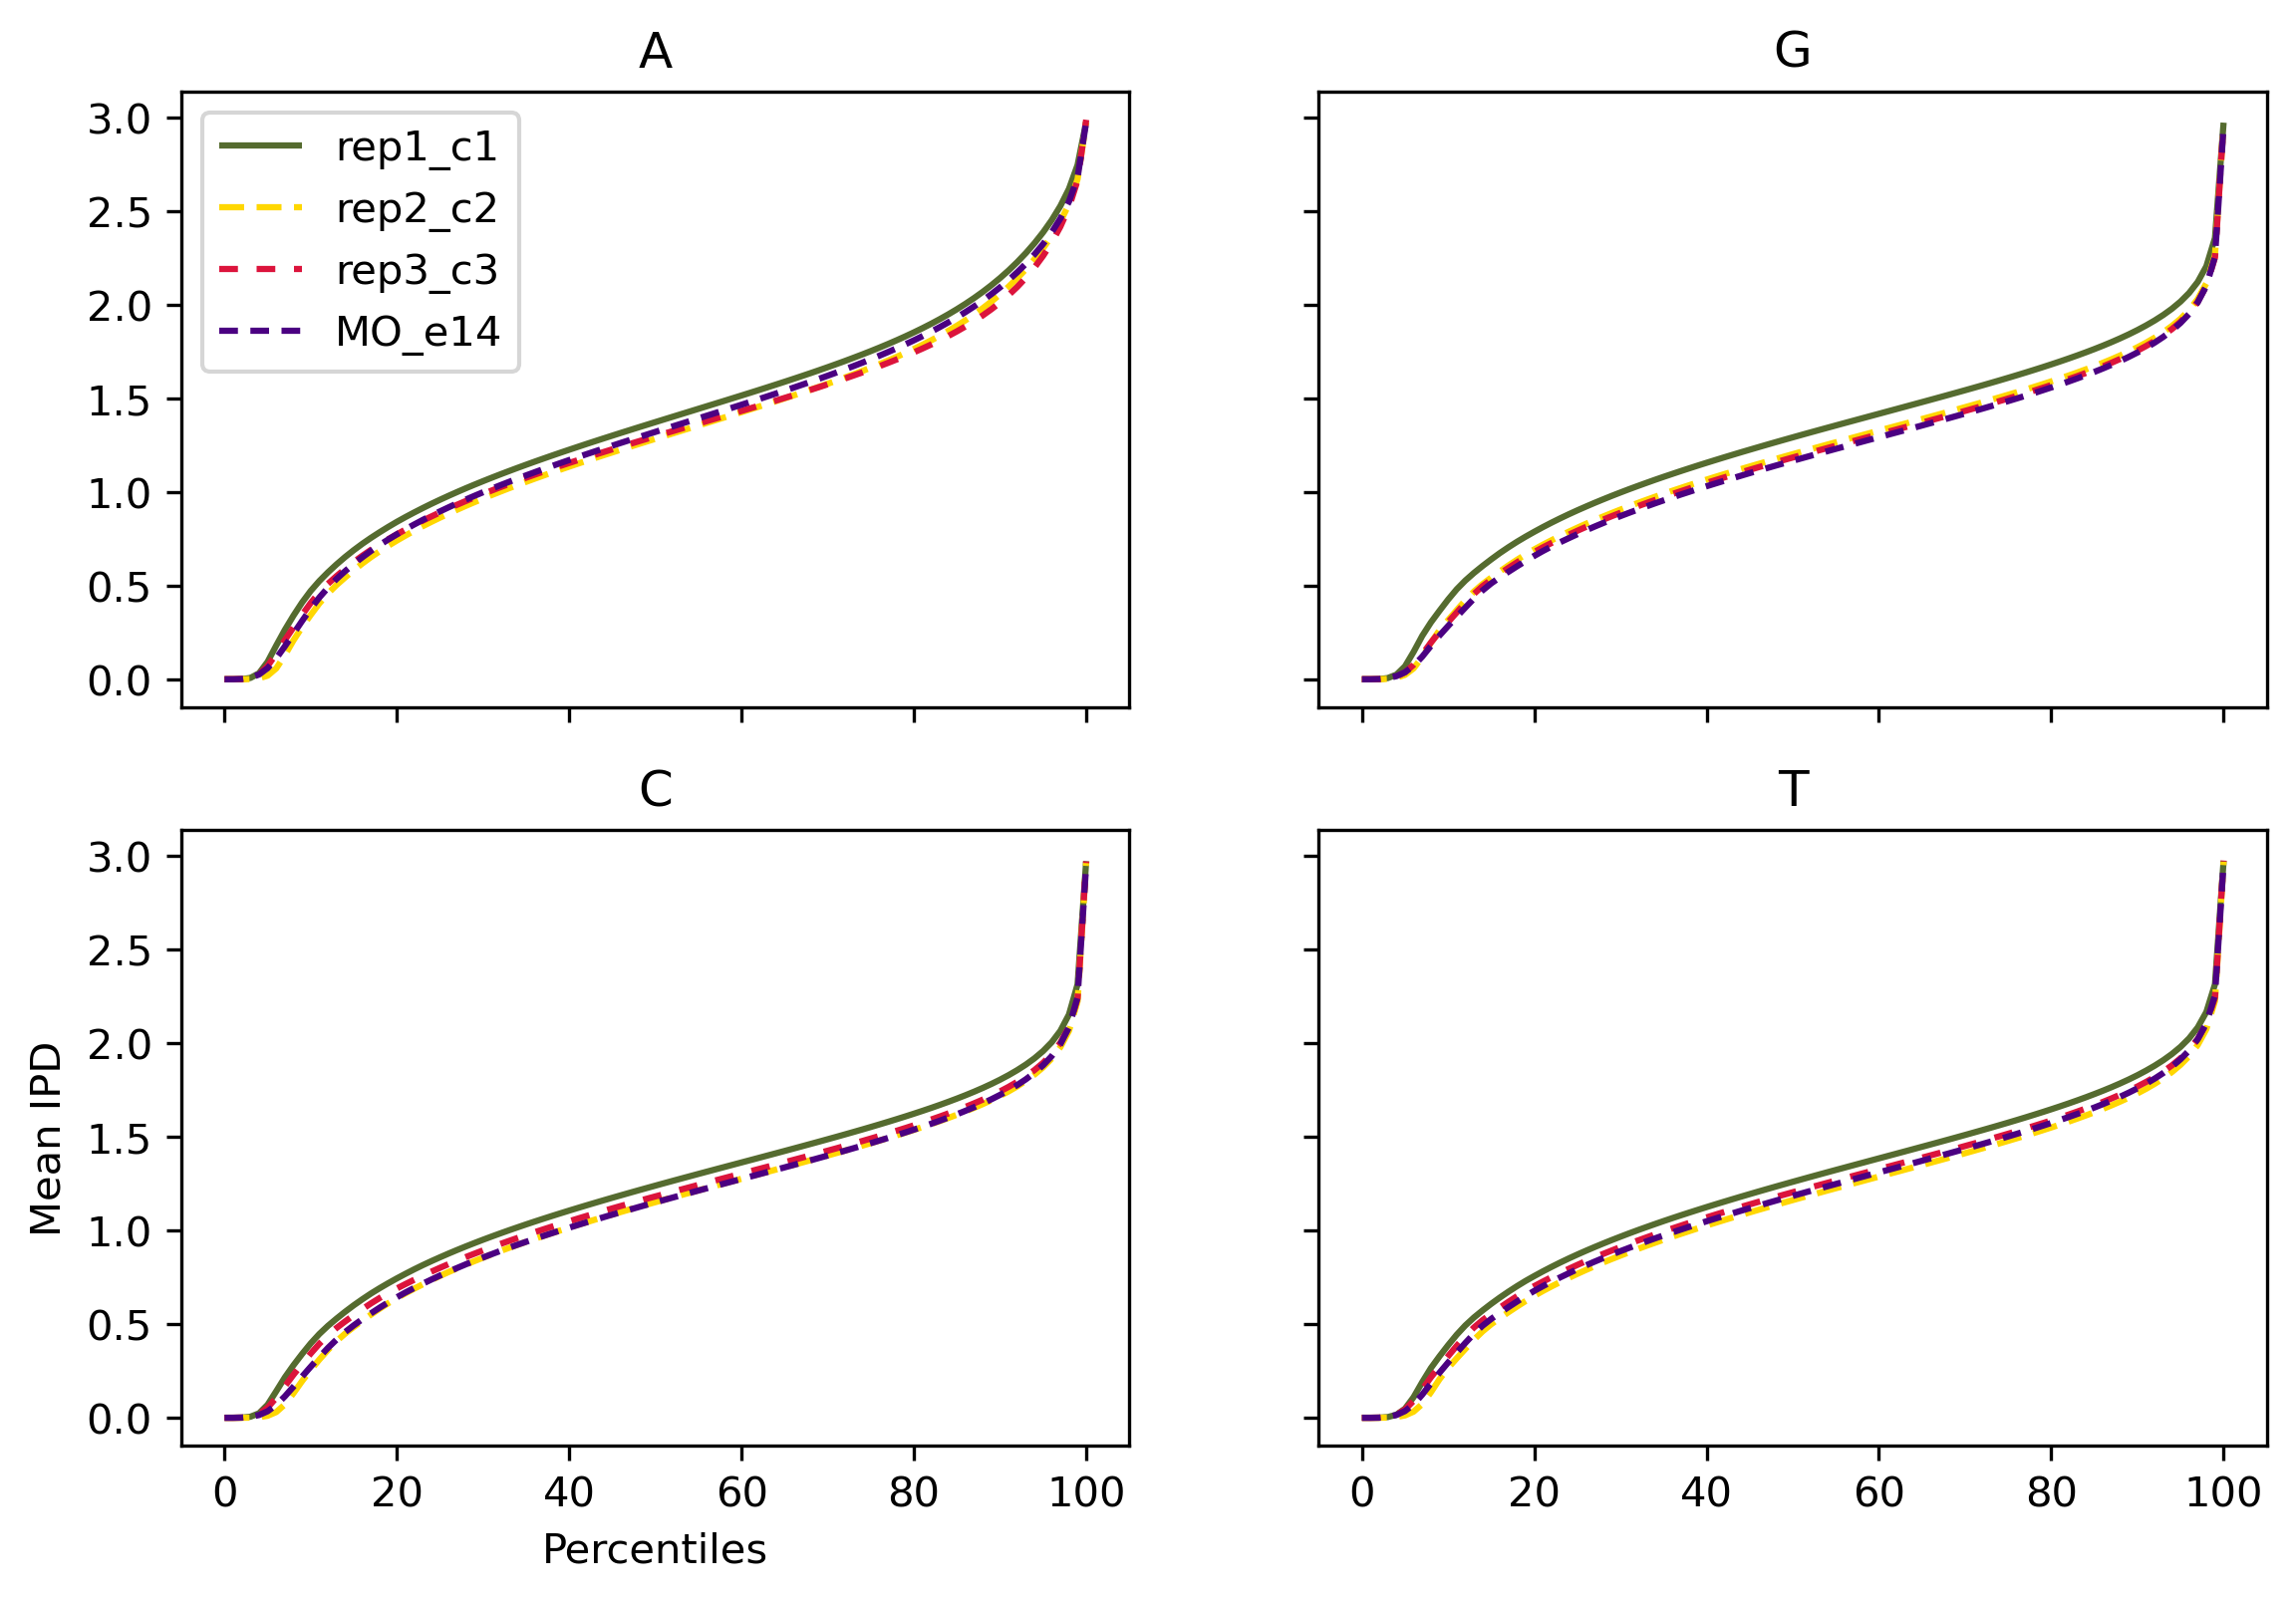

In [8]:
fig, ax = plt.subplots(2,2, figsize=(9,6), sharex=True, sharey=True)
coldic = {14:'darkolivegreen', 25:'gold', 41:'crimson', 51:'deepskyblue', 52:'darkblue', 63:'indigo'}
dashdic = {14:(4,0), 25:(4,2), 41:(3,3), 51:(4,4), 52:(2,2), 63:(3,2)}
sampns = {14:'rep1_c1', 25:'rep2_c2', 41:'rep3_c3', 51:'brdu_r1', 52:'brdu_r2', 63:'MO_e14'}
for samp in [14,25,41,63]:
    for ib, b in enumerate(bases): #enumerate(bases):
        lab = None
        if b == 'A':
            lab = sampns[samp]
        ax[ib%2, int(np.floor(ib/2))].plot(ixs, meanpercD[samp][b], color=coldic[samp], label=lab, dashes=dashdic[samp])
        ax[ib%2, int(np.floor(ib/2))].set_title(b)

ax[0,0].legend()
ax[1,0].set_xlabel('Percentiles')
ax[1,0].set_ylabel('Mean IPD')

Text(0, 0.5, 'Mean IPD')

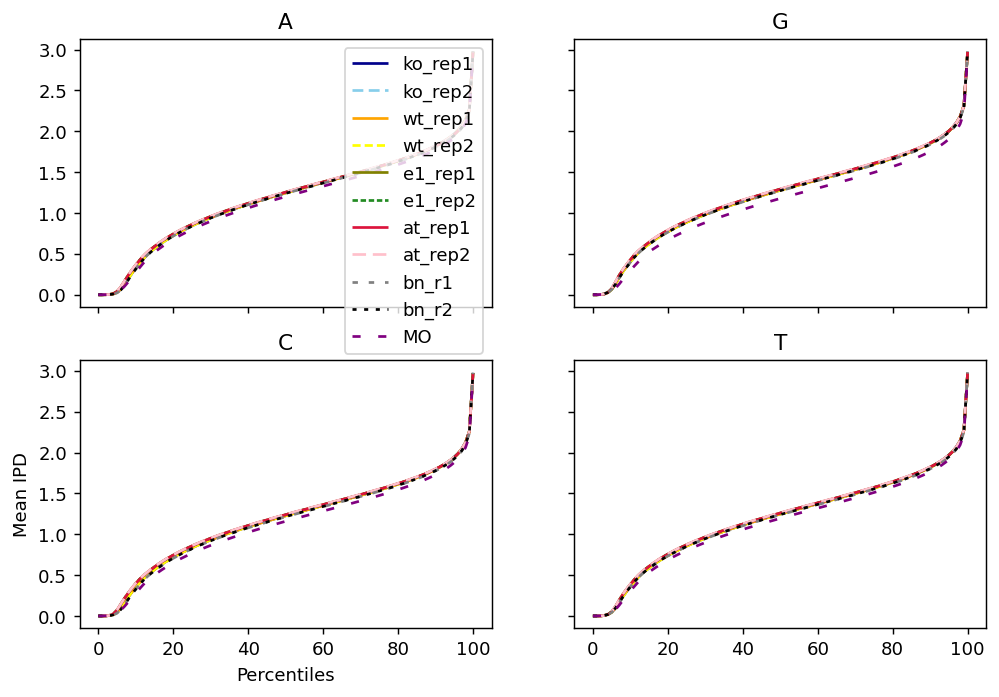

In [4]:
usesamples = [6,7,10,11,12,13,16,17, 49,50,64]



fig, ax = plt.subplots(2,2, figsize=(9,6), sharex=True, sharey=True)
coldic = {6:'darkblue', 7:'skyblue', 10:'orange', 11:'yellow', 12:'olive', 13:'forestgreen', 16:'crimson', 17:'pink',
          49:'gray', 50:'black', 64:'purple'}
dashdic = {6:(4,0), 7:(4,2), 10:(3,0), 11:(3,1.5), 12:(2,0), 13:(2,1), 16:(5,0), 17:(5,2.5),
           49:(2,4), 50:(1.5,2.8), 64:(3,6.5)}
sampns = {6:'ko_rep1', 7:'ko_rep2', 10:'wt_rep1', 11:'wt_rep2', 12:'e1_rep1',
          13:'e1_rep2', 16:'at_rep1', 17:'at_rep2', 49:'bn_r1', 50:'bn_r2', 64:'MO'}
for samp in usesamples:
    for ib, b in enumerate(bases): #enumerate(bases):
        lab = None
        if b == 'A':
            lab = sampns[samp]
        ax[ib%2, int(np.floor(ib/2))].plot(ixs, meanpercD[samp][b], color=coldic[samp], label=lab, dashes=dashdic[samp])
        ax[ib%2, int(np.floor(ib/2))].set_title(b)

ax[0,0].legend()
ax[1,0].set_xlabel('Percentiles')
ax[1,0].set_ylabel('Mean IPD')

## Make condensed representations of HMM output for smaller file size, easier upload to repository
21/12/1

In [110]:
stateName = {np.nan:'N', 1:'A', 0:'I'}

def hmmPathToString(hmmbin):
    hmmbin[np.isfinite(hmmbin)] = hmmbin[np.isfinite(hmmbin)] > 0.5

    nanse = np.where(np.diff(np.isfinite(hmmbin)))[0]

    inacswitch = np.diff(hmmbin)
    switchp = np.where(np.abs(inacswitch) == 1)[0]

    g = np.concatenate([[0], nanse[0:1]+1, switchp+1, nanse[1:2]+1, [hmmbin.shape[0]]])
    gdif = np.diff(g)

    thisstr = ''
    for ib, b in enumerate(g[0:-1]):
        if ib == 0 or ib == (len(g)-2):
            thisstr += str(gdif[ib]) + 'N'
        else:
            thisstr += str(gdif[ib]) + stateName[hmmbin[b]]
    
    return(thisstr)


for samp in np.arange(4,49):

    hmmFile = '{0}{1}/processed/binarized/{1}_{2}_NNsingle_HMM.pickle'.format(dataPBase,
                                                                              sampleRef['cell'][samp],
                                                                              sampleRef['sampleName'][samp])
    try:
        with open(hmmFile, 'rb') as fin:
            hmmdat = pickle.load(fin)

        zmwlist = list(hmmdat.keys())
        zmwlist.sort()

        outFile = '{0}{1}/processed/binarized/{1}_{2}_HMM_short.csv'.format(dataPBase,
                                                                            sampleRef['cell'][samp],
                                                                            sampleRef['sampleName'][samp])

        with open(outFile, 'w') as fout:
            for zmw in tqdm(zmwlist, position=0, ncols=100, desc=sampleRef['cell'][samp]+'_'+sampleRef['sampleName'][samp]):
                fout.write('{0},{1}\n'.format(zmw, hmmPathToString(hmmdat[zmw])))
    
    except FileNotFoundError:
        continue


210421_NA_SAMv2_mESCs_E14_mESCs_plusM_rep2: 100%|█████████| 169267/169267 [00:50<00:00, 3379.65it/s]
210421_NA_SAMv2_mESCs_SNF2h_ATPasemutAB_mESCs_plusM_rep1: 100%|█| 145251/145251 [00:35<00:00, 4090.1
210421_NA_SAMv2_mESCs_SNF2h_ATPasemutAB_mESCs_plusM_rep2: 100%|█| 273647/273647 [01:19<00:00, 3454.8
210427_NA_SAMv2mESCs_1.0prep_SNF2hKO_mESCs_plusM_rep1: 100%|█| 679108/679108 [03:17<00:00, 3440.14it
210427_NA_SAMv2mESCs_1.0prep_SNF2hKO_mESCs_plusM_rep2: 100%|█| 490368/490368 [02:24<00:00, 3403.99it
210427_NA_SAMv2mESCs_1.0prep_SNF2hWTAB_mESCs_plusM_rep1: 100%|█| 387763/387763 [02:01<00:00, 3188.12
210427_NA_SAMv2mESCs_1.0prep_SNF2hWTAB_mESCs_plusM_rep2: 100%|█| 548686/548686 [02:53<00:00, 3157.91
210427_NA_SAMv2mESCs_2.0prep_E14_mESCs_plusM_rep1: 100%|██| 152844/152844 [00:45<00:00, 3353.41it/s]
210427_NA_SAMv2mESCs_2.0prep_E14_mESCs_plusM_rep2: 100%|██| 133648/133648 [00:39<00:00, 3363.91it/s]
210427_NA_SAMv2mESCs_2.0prep_SNF2h_ATPasemutAB_mESCs_plusM_rep1: 100%|█| 99480/99480 [00:24

In [113]:


pd.set_option('display.max_rows', 100)
sampleRef

,cell,sampleName,unalignedSubreadsFile,ccsFile,alignedSubreadsFile,alignedCcsFile,reference,processed
0,pbrun10_CTCFpool_2,Indep_naked_plusM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...
1,pbrun10_CTCFpool_2,Indep_naked_minusM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...
2,pbrun10_CTCFpool_2,Depen_naked_plusM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...
3,pbrun10_CTCFpool_2,Depen_naked_minusM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...
4,pbrun10_CTCFpool_2,IndepArray_20to1_plusM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...
5,pbrun10_CTCFpool_2,IndepArray_15to1_plusM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...
6,pbrun10_CTCFpool_2,IndepArray_10to1_plusM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...
7,pbrun10_CTCFpool_2,IndepArray_5to1_plusM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...
8,pbrun10_CTCFpool_2,DepenArray_20to1_plusM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...
9,pbrun10_CTCFpool_2,DepenArray_15to1_plusM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...


In [2]:
# now do the same for S1 and S2 results

stateName = {1:'A', 0:'I'}

def hmmPathToString(hmmbin):
    hmmbin[np.isfinite(hmmbin)] = hmmbin[np.isfinite(hmmbin)] > 0.5

    inacswitch = np.diff(hmmbin)
    switchp = np.where(np.abs(inacswitch) == 1)[0]

    g = np.concatenate([[0], switchp+1, [hmmbin.shape[0]]])
    gdif = np.diff(g)

    thisstr = ''
    for ib, b in enumerate(g[0:-1]):
        thisstr += str(gdif[ib]) + stateName[hmmbin[b]]
    
    return(thisstr)

sampleRef = pd.read_csv(dataPBase + 'pbrun10_CTCFpool_2/pbrun10_CTCFpool_2.sampleReference.csv')
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + 'pbrun10_CTCFpool_1/pbrun10_CTCFpool_1.sampleReference.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210516_NA_SNF2hCTCFarray_ST_rep2/210516_NA_SNF2hCTCFarray_ST_rep2.sampleReference.wynton.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210520_NA_SNF2hCTCFarray_MT_rep1/210520_NA_SNF2hCTCFarray_MT_rep1.sampleReference.wynton.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210608_NA_SNF2hCTCFarray_MT_rep2/210608_NA_SNF2hCTCFarray_MT_rep2.sampleReference.wynton.csv')],
                      ignore_index=True)

del sampleRef['index'] 

for samp in np.arange(sampleRef.shape[0]):

    hmmFile = '{0}{1}/processed/binarized/{1}_{2}_HMM.npy'.format(dataPBase,
                                                                  sampleRef['cell'][samp],
                                                                  sampleRef['sampleName'][samp])
    try:
        hmmdat = np.load(hmmFile)

        outFile = '{0}{1}/processed/binarized/{1}_{2}_HMM_short.csv'.format(dataPBase,
                                                                            sampleRef['cell'][samp],
                                                                            sampleRef['sampleName'][samp])

        with open(outFile, 'w') as fout:
            for iz in tqdm(np.arange(hmmdat.shape[0]), position=0, ncols=120,
                           desc=sampleRef['cell'][samp]+'_'+sampleRef['sampleName'][samp]):
                fout.write('{0},{1}\n'.format(iz, hmmPathToString(hmmdat[iz,:])))
    
    except FileNotFoundError:
        continue


pbrun10_CTCFpool_2_DepenArray_5to1_plusADP: 100%|███████████████████████████████| 45597/45597 [00:07<00:00, 5972.47it/s]
pbrun10_CTCFpool_1_DepenArray_20to1_plusM_minusATP: 100%|███████████████████████| 38859/38859 [00:06<00:00, 6203.66it/s]
pbrun10_CTCFpool_1_DepenArray_15to1_plusM_minusATP: 100%|███████████████████████| 37744/37744 [00:07<00:00, 5163.68it/s]
pbrun10_CTCFpool_1_DepenArray_10to1_plusM_minusATP: 100%|███████████████████████| 41964/41964 [00:07<00:00, 5398.67it/s]
pbrun10_CTCFpool_1_DepenArray_5to1_plusM_minusATP: 100%|████████████████████████| 35102/35102 [00:07<00:00, 4957.70it/s]
pbrun10_CTCFpool_1_IndepArray_20to1_plusM_minusATP: 100%|███████████████████████| 50249/50249 [00:07<00:00, 6922.57it/s]
pbrun10_CTCFpool_1_IndepArray_15to1_plusM_minusATP: 100%|███████████████████████| 50702/50702 [00:09<00:00, 5339.89it/s]
pbrun10_CTCFpool_1_IndepArray_10to1_plusM_minusATP: 100%|███████████████████████| 55734/55734 [00:11<00:00, 4666.47it/s]
pbrun10_CTCFpool_1_IndepArray_5t

## Gather files for Zenodo repository
21/12/08

In [1]:
import os
from shutil import copy2
import pandas as pd
import numpy as np
import socket

if 'biochem1' in socket.gethostname():
    dataPBase = '/avicenna/vramani/analyses/pacbio/'
    
zdir = '/avicenna/cmcnally/zenodo_repository'
if not os.path.exists(zdir):
    os.makedirs(zdir)

for subdir in ['S1', 'S2', 'mESC']:
    if not os.path.exists(zdir + '/' + subdir):
        os.makedirs(zdir + '/' + subdir)

        
# copy over S1 and S2 first ===============================================================

# Load in the sample reference tables for the CTCF site samples
sampleRef = pd.read_csv(dataPBase + 'pbrun10_CTCFpool_2/pbrun10_CTCFpool_2.sampleReference.csv')
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + 'pbrun10_CTCFpool_1/pbrun10_CTCFpool_1.sampleReference.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210516_NA_SNF2hCTCFarray_ST_rep2/210516_NA_SNF2hCTCFarray_ST_rep2.sampleReference.wynton.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210520_NA_SNF2hCTCFarray_MT_rep1/210520_NA_SNF2hCTCFarray_MT_rep1.sampleReference.wynton.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210608_NA_SNF2hCTCFarray_MT_rep2/210608_NA_SNF2hCTCFarray_MT_rep2.sampleReference.wynton.csv')],
                      ignore_index=True)

del sampleRef['index']

indepSamples = np.nonzero([(name[0:5] == 'Indep' or name[0:8] == 'CTCF_Ind') for name in sampleRef['sampleName']])[0]
depSamples = np.nonzero([(name[0:5] == 'Depen' or name[0:8] == 'CTCF_Dep') for name in sampleRef['sampleName']])[0]

subdirs = ['S1', 'S2']
samplesets = [indepSamples, depSamples]
for i in range(2):
    subdir = subdirs[i]
    sampset = samplesets[i]
    HMMpath = os.path.join(zdir, subdir, 'accessibilityPath')
    Densitypath = os.path.join(zdir, subdir, 'density')
    if not os.path.exists(HMMpath):
        os.makedirs(HMMpath)
    if not os.path.exists(Densitypath):
        os.makedirs(Densitypath)
    
    for samp in sampset:
        try:
            copy2('{0}{1}/processed/binarized/{1}_{2}_HMM_short.csv'.format(dataPBase,
                                                                            sampleRef['cell'][samp],
                                                                            sampleRef['sampleName'][samp]),
                  HMMpath)
        except FileNotFoundError:
            continue
        
        try:
            copy2('{0}{1}/processed/density/{1}_{2}_density.csv'.format(dataPBase,
                                                                        sampleRef['cell'][samp],
                                                                        sampleRef['sampleName'][samp]),
                  Densitypath)
        except FileNotFoundError:
            continue
    
copy2('{0}{1}/snf2h_independent_site_observed.fasta'.format(dataPBase,'pbrun10_CTCFpool_2'),
      os.path.join(zdir, 'S1', 'S1_reference.fasta'))
copy2('{0}{1}/snf2h_dependent_site_observed.fasta'.format(dataPBase,'pbrun10_CTCFpool_2'),
      os.path.join(zdir, 'S2', 'S2_reference.fasta'))

copy2('/avicenna/cmcnally/code/scripts/expandAccessibilityAmplicon.py', os.path.join(zdir, 'S1'))
copy2('/avicenna/cmcnally/code/scripts/expandAccessibilityAmplicon.py', os.path.join(zdir, 'S2'))



'/avicenna/cmcnally/zenodo_repository/S2/expandAccessibilityAmplicon.py'

In [6]:
sampleRef = pd.read_csv(dataPBase + 'sampleRef_K562_mESC.csv', sep=',', index_col=0)
sampleRef

,cell,sampleName,unalignedSubreadsFile,ccsFile,alignedSubreadsFile,alignedCcsFile,reference,processed,index
0,pbrun9_SAMv2,k562_SAMv2_minusM_rep1,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/genomes/hg38/hg38.mmi,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN
1,pbrun9_SAMv2,k562_SAMv2_minusM_rep2,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/genomes/hg38/hg38.mmi,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN
2,pbrun9_SAMv2,k562_SAMv2_plusM_rep1,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/genomes/hg38/hg38.mmi,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN
3,pbrun9_SAMv2,k562_SAMv2_plusM_rep2,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/genomes/hg38/hg38.mmi,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN
4,pbrun11_mESCs_SNF2h,SNF2hKO_mESCs_plusM_rep1,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
5,pbrun11_mESCs_SNF2h,SNF2hKO_mESCs_plusM_rep2,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
6,pbrun11_mESCs_SNF2h,SNF2hKO_mESCs_minusM_rep1,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
7,pbrun11_mESCs_SNF2h,SNF2hKO_mESCs_minusM_rep2,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
8,pbrun11_mESCs_SNF2h,SNF2hWTAB_mESCs_plusM_rep1,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
9,pbrun11_mESCs_SNF2h,SNF2hWTAB_mESCs_plusM_rep2,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN


In [5]:
subdir = 'mESC'
HMMpath = os.path.join(zdir, subdir, 'accessibilityPath')
DensityPath = os.path.join(zdir, subdir, 'density')
if not os.path.exists(HMMpath):
    os.makedirs(HMMpath)
if not os.path.exists(DensityPath):
    os.makedirs(DensityPath)
AlignPath = os.path.join(zdir, subdir, 'alignments')
if not os.path.exists(AlignPath):
    os.makedirs(AlignPath)
    
sampleRef = pd.read_csv(dataPBase + 'sampleRef_K562_mESC.csv', sep=',', index_col=0)

for samp in range(sampleRef.shape[0]):
    if 'ATP' in sampleRef['sampleName'][samp]:
        continue
    try:
        copy2('{0}{1}/processed/binarized/{1}_{2}_HMM_short.csv'.format(dataPBase,
                                                                        sampleRef['cell'][samp],
                                                                        sampleRef['sampleName'][samp]),
              HMMpath)
    except FileNotFoundError:
        continue
        
    try:
        copy2('{0}{1}/processed/density/{1}_{2}_density.csv'.format(dataPBase,
                                                                    sampleRef['cell'][samp],
                                                                    sampleRef['sampleName'][samp]),
              DensityPath)
    except FileNotFoundError:
        continue
        
    try:
        copy2('{0}{1}/aligned/{1}.split.{2}.ccs.aligned.sorted.bam'.format(dataPBase,
                                                                           sampleRef['cell'][samp],
                                                                           sampleRef['sampleName'][samp]),
              AlignPath)
    except FileNotFoundError:
        continue
        
copy2('/avicenna/cmcnally/code/scripts/expandAccessibilityGenomic.py', os.path.join(zdir, 'mESC'))

'/avicenna/cmcnally/zenodo_repository/mESC/expandAccessibilityGenomic.py'

In [ ]:
######################### scrap

# Now dependent

subdir = 'S2'
HMMpath = os.path.join(zdir, subdir, 'accessibilityPath')
if not os.path.exists(HMMpath):
    os.makedirs(HMMpath)
    
for samp in depSamples:
    copy2('{0}{1}/processed/binarized/{1}_{2}_HMM_short.csv'.format(dataPBase,
                                                                    sampleRef['cell'][samp],
                                                                    sampleRef['sampleName'][samp]),
          HMMpath)

In [91]:
sample2 = sampleRef[['cell', 'sampleName']].copy()
sample2['usfile'] = ['{0}.split.{1}--{1}.bam'.format(sampleRef['cell'][i],
                                                     sampleRef['sampleName'][i])
                     for i in range(sampleRef.shape[0])]
#os.path.basename(sampleRef['unalignedSubreadsFile'][i]) for i in range(sampleRef.shape[0])]

In [94]:
pd.set_option('display.max_rows', 100)
sample2.to_csv('/avicenna/cmcnally/zenodo_repository/sampleBam.csv')

In [93]:
sample2

,cell,sampleName,usfile
0,pbrun10_CTCFpool_2,Indep_naked_plusM,pbrun10_CTCFpool_2.split.Indep_naked_plusM--In...
1,pbrun10_CTCFpool_2,Indep_naked_minusM,pbrun10_CTCFpool_2.split.Indep_naked_minusM--I...
2,pbrun10_CTCFpool_2,Depen_naked_plusM,pbrun10_CTCFpool_2.split.Depen_naked_plusM--De...
3,pbrun10_CTCFpool_2,Depen_naked_minusM,pbrun10_CTCFpool_2.split.Depen_naked_minusM--D...
4,pbrun10_CTCFpool_2,IndepArray_20to1_plusM,pbrun10_CTCFpool_2.split.IndepArray_20to1_plus...
5,pbrun10_CTCFpool_2,IndepArray_15to1_plusM,pbrun10_CTCFpool_2.split.IndepArray_15to1_plus...
6,pbrun10_CTCFpool_2,IndepArray_10to1_plusM,pbrun10_CTCFpool_2.split.IndepArray_10to1_plus...
7,pbrun10_CTCFpool_2,IndepArray_5to1_plusM,pbrun10_CTCFpool_2.split.IndepArray_5to1_plusM...
8,pbrun10_CTCFpool_2,DepenArray_20to1_plusM,pbrun10_CTCFpool_2.split.DepenArray_20to1_plus...
9,pbrun10_CTCFpool_2,DepenArray_15to1_plusM,pbrun10_CTCFpool_2.split.DepenArray_15to1_plus...


In [31]:
sdat.iloc[:,0:5]

,title,Pre-remodelling preparation,SNF2h Remodeling Turnover Conditions,SNF2h Remodeling ATP/ADP Conditions,EcoGII Methylation
0,S2_array_20:1_+M_-ATP_ST,"CTCF site 2 from Mus Musculus amplified, gibso...",single-turnover,minus ATP,EcoGII Methylated
1,S2_array 15:1 +M -ATP_ST,"CTCF site 2 from Mus Musculus amplified, gibso...",single-turnover,minus ATP,EcoGII Methylated
2,S2_array 10:1 +M -ATP_ ST,"CTCF site 2 from Mus Musculus amplified, gibso...",single-turnover,minus ATP,EcoGII Methylated
3,S2_array 5:1 +M -ATP_ ST,"CTCF site 2 from Mus Musculus amplified, gibso...",single-turnover,minus ATP,EcoGII Methylated
4,S1_array_20:1 +M -ATP_ ST,"CTCF site 1 from Mus Musculus amplified, gibso...",single-turnover,minus ATP,EcoGII Methylated
...,...,...,...,...,...
87,S1_array 5:1_unrem_+M_rep2,"CTCF site 1 from Mus Musculus amplified, gibso...",unremodeled,unremodeled,EcoGII Methylated
88,S2_array_ 20:1_unrem_+M_rep2,"CTCF site 2 from Mus Musculus amplified, gibso...",unremodeled,unremodeled,EcoGII Methylated
89,S2_array_15:1_unrem_+M_rep2,"CTCF site 2 from Mus Musculus amplified, gibso...",unremodeled,unremodeled,EcoGII Methylated
90,S2_array_10:1_unrem_+M_rep2,"CTCF site 2 from Mus Musculus amplified, gibso...",unremodeled,unremodeled,EcoGII Methylated


In [32]:
# read in S1S2_sampledat and format better
import re

sdat = pd.read_csv('/avicenna/cmcnally/zenodo_repository/S1S2_sampledat.csv')
filepref = []
for i in range(sdat.shape[0]):
    a = re.match('(.+).split.(.+)--', sdat['raw file'][i])
    filepref.append(a.groups()[0] + '_' + a.groups()[1])
    
newsd = sdat.iloc[:,0:5].copy()
newsd['File name'] = filepref

site = []
for i in range(newsd.shape[0]):
    site.append(int(newsd['title'][i][1]))
site = np.array(site)

newsd.iloc[site == 1,:].to_csv('/avicenna/cmcnally/zenodo_repository/S1/S1_samples.csv', index=False)
newsd.iloc[site == 2,:].to_csv('/avicenna/cmcnally/zenodo_repository/S2/S2_samples.csv', index=False)

## Expand compressed HMM path
21/12/09

In [50]:
import re
import pandas as pd
import numpy as np
import pickle

def expandAccessibilityGenomic(hmm_short_F):
    hmmShort = pd.read_csv(hmm_short_F, header=None, names=['zmw', 'path'])
    
    hmmD = {}
    
    for i in range(hmmShort.shape[0]):
        thiszmw = hmmShort['zmw'][i]
        thispath = hmmShort['path'][i]
        pieces = re.findall('([0-9]+)([NIA])', thispath)

        totlength = 0
        for block in range(len(pieces)):
            totlength += int(pieces[block][0])

        fullPath = np.full(totlength, np.nan, dtype=np.float16)
        curPos = 0
        for block in range(len(pieces)):
            blockLen = int(pieces[block][0])

            if pieces[block][1] == 'N':
                fullPath[curPos:(curPos+blockLen)] = np.nan
            if pieces[block][1] == 'A':
                fullPath[curPos:(curPos+blockLen)] = 1
            if pieces[block][1] == 'I':
                fullPath[curPos:(curPos+blockLen)] = 0

            curPos += blockLen

        hmmD[thiszmw] = fullPath
    
    return hmmD

# load in compressed file

sampleRef = pd.read_csv(dataPBase + 'sampleRef_K562_mESC.csv', sep=',', index_col=0)

samp = 14

hmmshortF = '{0}{1}/processed/binarized/{1}_{2}_HMM_short.csv'.format(dataPBase,
                                                                      sampleRef['cell'][samp],
                                                                      sampleRef['sampleName'][samp])

hmmout = expandAccessibilityGenomic(hmmshortF)


# load the original file for comparison

hmmOF = '{0}{1}/processed/binarized/{1}_{2}_NNsingle_HMM.pickle'.format(dataPBase,
                                                                        sampleRef['cell'][samp],
                                                                        sampleRef['sampleName'][samp])
with open(hmmOF, 'rb') as fin:
    hmmO = pickle.load(fin)

In [62]:
sampleRef = pd.read_csv(dataPBase + 'pbrun10_CTCFpool_2/pbrun10_CTCFpool_2.sampleReference.csv')
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + 'pbrun10_CTCFpool_1/pbrun10_CTCFpool_1.sampleReference.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210516_NA_SNF2hCTCFarray_ST_rep2/210516_NA_SNF2hCTCFarray_ST_rep2.sampleReference.wynton.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210520_NA_SNF2hCTCFarray_MT_rep1/210520_NA_SNF2hCTCFarray_MT_rep1.sampleReference.wynton.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210608_NA_SNF2hCTCFarray_MT_rep2/210608_NA_SNF2hCTCFarray_MT_rep2.sampleReference.wynton.csv')],
                      ignore_index=True)

del sampleRef['index']

def expandAccessibilityAmplicon(hmm_short_F):
    hmmShort = pd.read_csv(hmm_short_F, header=None, names=['zmw', 'path'])
    
    pieces = re.findall('([0-9]+)([NIA])', hmmShort['path'][0])
    totlength = 0
    for block in range(len(pieces)):
        totlength += int(pieces[block][0])

    hmmA = np.full((hmmShort.shape[0], totlength), np.nan, dtype=np.float16)

    for i in range(hmmShort.shape[0]):
        thispath = hmmShort['path'][i]
        pieces = re.findall('([0-9]+)([NIA])', thispath)

        curPos = 0
        for block in range(len(pieces)):
            blockLen = int(pieces[block][0])

            if pieces[block][1] == 'N':
                hmmA[i, curPos:(curPos+blockLen)] = np.nan
            if pieces[block][1] == 'A':
                hmmA[i, curPos:(curPos+blockLen)] = 1
            if pieces[block][1] == 'I':
                hmmA[i, curPos:(curPos+blockLen)] = 0

            curPos += blockLen
    
    return hmmA

In [69]:
samp = 6
hmm_short_F = '{0}{1}/processed/binarized/{1}_{2}_HMM_short.csv'.format(dataPBase,
                                                                      sampleRef['cell'][samp],
                                                                      sampleRef['sampleName'][samp])



In [70]:
hmmShort = pd.read_csv(hmm_short_F, header=None, names=['zmw', 'path'])

In [82]:
os.path.basename(hmmshortF).replace('_HMM_short.csv', '_HMM.npy')

'pbrun10_CTCFpool_2_IndepArray_10to1_plusM_HMM.npy'

In [74]:
i = 0
thispath = hmmShort['path'][i]
pieces = re.findall('([0-9]+)([NIA])', thispath)

totlength = 0
for block in range(len(pieces)):
    totlength += int(pieces[block][0])
    
hmmA = np.full((hmmShort.shape[0], totlength), np.nan, dtype=np.float16)

for i in range(hmmShort.shape[0]):
    thispath = hmmShort['path'][i]
    pieces = re.findall('([0-9]+)([NIA])', thispath)

    curPos = 0
    for block in range(len(pieces)):
        blockLen = int(pieces[block][0])

        if pieces[block][1] == 'N':
            hmmA[i, curPos:(curPos+blockLen)] = np.nan
        if pieces[block][1] == 'A':
            hmmA[i, curPos:(curPos+blockLen)] = 1
        if pieces[block][1] == 'I':
            hmmA[i, curPos:(curPos+blockLen)] = 0

        curPos += blockLen

In [77]:
hmmA[0,:]

array([1., 1., 1., ..., 1., 1., 1.], dtype=float16)

In [54]:
zmw = 129

for k in range(hmmout[zmw].shape[0]):
    if hmmout[zmw][k] != hmmO[zmw][k]:
        print('{0}: {1}, {2}'.format(k, hmmout[zmw][k], hmmO[zmw][k]))

0: nan, nan
1: nan, nan
2: nan, nan
3: nan, nan
64: 1.0, 0.6666666865348816
65: 0.0, 0.3333333432674408
191: 0.0, 0.5
213: 0.0, 0.3333333432674408
214: 1.0, 0.6666666865348816
425: 0.0, 0.3333333432674408
426: 1.0, 0.6666666865348816
466: 1.0, 0.75
467: 0.0, 0.5
468: 0.0, 0.25
798: nan, nan
799: nan, nan
800: nan, nan
801: nan, nan
802: nan, nan
803: nan, nan
804: nan, nan


In [29]:
i = 0
thiszmw = hmmShort['zmw'][i]
thispath = hmmShort['path'][i]

In [39]:


pieces = re.findall('([0-9]+)([NIA])', thispath)



In [43]:
thispath

'3N43I41A140I65A121I62A136I61A138I64A139I44A108I58A122I35A146I22A4N'

In [61]:
regions = {'zmw':[], 'length':[], 'start':[], 'end':[]}

for zmw in sorted(list(hmmO.keys())):
    hmm = hmmO[zmw]

    inacregion = hmm
    inacregion[np.isfinite(inacregion)] = inacregion[np.isfinite(inacregion)] > 0.5

    inacswitch = np.diff(inacregion)
    switchp = np.where(np.logical_or(inacswitch == 1, inacswitch == -1))[0]

    if len(switchp) < 1:
        if hmm[50] == 0: #checking if the entire molecule is inaccessible, 50 being an arbitrary position to check
            regions['zmw'].append(zmw)
            regions['length'].append(len(hmm) - 0)
            regions['start'].append(np.nan)
            regions['end'].append(np.nan)
        continue

    if inacswitch[switchp[0]] == -1:
        inInacReg = False
        regStart = -1
        regEnd = -1
    if inacswitch[switchp[0]] == 1:
        inInacReg = True
        regStart = np.nan
        regEnd = -1
    for point in switchp:
        if inacswitch[point] == -1 and not inInacReg:
            inInacReg = True
            regStart = point + 1
        if inacswitch[point] == 1 and inInacReg:
            inInacReg = False
            regEnd = point
            regions['zmw'].append(zmw)
            if np.isnan(regStart):
                regions['length'].append(regEnd - 0)
            else:
                regions['length'].append(regEnd - regStart)
            regions['start'].append(regStart)
            regions['end'].append(regEnd)
    if inInacReg:
        regions['zmw'].append(zmw)
        regions['length'].append(len(hmm) - regStart)
        regions['start'].append(regStart)
        regions['end'].append(np.nan)

regionD = pd.DataFrame(regions)

In [60]:
regions = {'zmw':[], 'length':[], 'start':[], 'end':[]}

for zmw in sorted(list(hmmout.keys())):
    hmm = hmmout[zmw]

    inacregion = hmm
    inacregion[np.isfinite(inacregion)] = inacregion[np.isfinite(inacregion)] > 0.5

    inacswitch = np.diff(inacregion)
    switchp = np.where(np.logical_or(inacswitch == 1, inacswitch == -1))[0]

    if len(switchp) < 1:
        if hmm[50] == 0: #checking if the entire molecule is inaccessible, 50 being an arbitrary position to check
            regions['zmw'].append(zmw)
            regions['length'].append(len(hmm) - 0)
            regions['start'].append(np.nan)
            regions['end'].append(np.nan)
        continue

    if inacswitch[switchp[0]] == -1:
        inInacReg = False
        regStart = -1
        regEnd = -1
    if inacswitch[switchp[0]] == 1:
        inInacReg = True
        regStart = np.nan
        regEnd = -1
    for point in switchp:
        if inacswitch[point] == -1 and not inInacReg:
            inInacReg = True
            regStart = point + 1
        if inacswitch[point] == 1 and inInacReg:
            inInacReg = False
            regEnd = point
            regions['zmw'].append(zmw)
            if np.isnan(regStart):
                regions['length'].append(regEnd - 0)
            else:
                regions['length'].append(regEnd - regStart)
            regions['start'].append(regStart)
            regions['end'].append(regEnd)
    if inInacReg:
        regions['zmw'].append(zmw)
        regions['length'].append(len(hmm) - regStart)
        regions['start'].append(regStart)
        regions['end'].append(np.nan)

regionDnew = pd.DataFrame(regions)

In [58]:
regionD

,zmw,length,start,end
0,4,45,NaN,45.0
1,4,139,87.0,226.0
2,4,120,292.0,412.0
3,4,135,475.0,610.0
4,4,137,672.0,809.0
...,...,...,...,...
1413643,124060095,19,1724.0,1743.0
1413644,124060095,104,1809.0,1913.0
1413645,124060197,139,22.0,161.0
1413646,124060197,122,218.0,340.0


In [59]:
regionDnew

,zmw,length,start,end
0,4,45,NaN,45.0
1,4,139,87.0,226.0
2,4,120,292.0,412.0
3,4,135,475.0,610.0
4,4,137,672.0,809.0
...,...,...,...,...
1413643,180554581,141,684.0,825.0
1413644,180554581,125,864.0,989.0
1413645,180554581,146,1046.0,1192.0
1413646,180554581,268,1270.0,1538.0
